In [ ]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
## Mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Load the fertilizer and crop data
fert_df = pd.read_csv('/content/gdrive/MyDrive/CRP_DATASET/FertilizerData.csv')
crp_df = pd.read_csv('/content/gdrive/MyDrive/CRP_DATASET/CropData.csv')

In [ ]:
fert_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  22 non-null     int64  
 1   Crop        22 non-null     object 
 2   N           22 non-null     int64  
 3   P           22 non-null     int64  
 4   K           22 non-null     int64  
 5   pH          22 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.2+ KB


In [ ]:
fert_df.head()

,Unnamed: 0,Crop,N,P,K,pH
0,0,rice,80,40,40,5.5
1,3,maize,80,40,20,5.5
2,5,chickpea,40,60,80,5.5
3,12,kidneybeans,20,60,20,5.5
4,13,pigeonpeas,20,60,20,5.5


In [ ]:
fert_df.drop('Unnamed: 0',axis = 1,inplace = True)
fert_df.head()

,Crop,N,P,K,pH
0,rice,80,40,40,5.5
1,maize,80,40,20,5.5
2,chickpea,40,60,80,5.5
3,kidneybeans,20,60,20,5.5
4,pigeonpeas,20,60,20,5.5


In [ ]:
fert_df.describe()

,N,P,K,pH
count,22.000000,22.000000,22.000000,22.000000
mean,50.454545,45.681818,48.181818,5.409091
std,36.315715,32.634172,51.698426,0.590326
min,20.000000,10.000000,10.000000,4.000000
25%,20.000000,20.000000,20.000000,5.500000
50%,30.000000,40.000000,30.000000,5.500000
75%,80.000000,60.000000,50.000000,5.500000
max,120.000000,125.000000,200.000000,6.500000


In [ ]:
fert_df['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

# Exploratory Data Analysis

**Univariate Analysis**

Text(0, 0.5, 'Nitrogen')

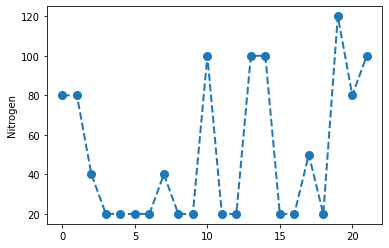

In [ ]:
plt.plot(fert_df['N'], marker='o', linestyle = 'dashed',linewidth = 2, markersize = 8)
plt.ylabel('Nitrogen')

Text(0, 0.5, 'Phosphorous')

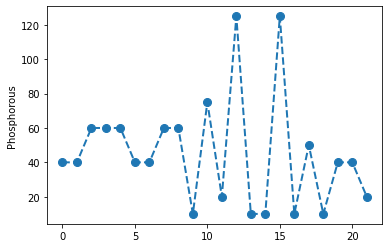

In [ ]:
plt.plot(fert_df['P'], marker='o', linestyle = 'dashed',linewidth = 2, markersize = 8)
plt.ylabel('Phosphorous')

Text(0, 0.5, 'Potassium')

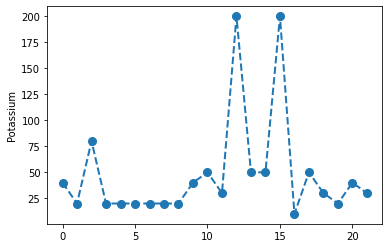

In [ ]:
plt.plot(fert_df['K'], marker='o', linestyle = 'dashed',linewidth = 2, markersize = 8)
plt.ylabel('Potassium')

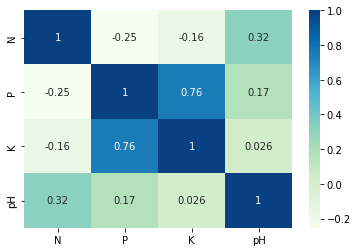

In [ ]:
#Heatmap
sns.heatmap(fert_df.corr(),annot = True, cmap = 'GnBu') #coolwarm gist_earth inferno_r gist_gray

In [ ]:
crp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2200 non-null   int64  
 1   temperature  2200 non-null   float64
 2   humidity     2200 non-null   float64
 3   ph           2200 non-null   float64
 4   rainfall     2200 non-null   float64
 5   label        2200 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 103.2+ KB


In [ ]:
crp_df.head()

,Unnamed: 0,temperature,humidity,ph,rainfall,label
0,0,20.879744,82.002744,6.502985,202.935536,rice
1,1,21.770462,80.319644,7.038096,226.655537,rice
2,2,23.004459,82.320763,7.840207,263.964248,rice
3,3,26.491096,80.158363,6.980401,242.864034,rice
4,4,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
crp_df.drop('Unnamed: 0',axis = 1,inplace = True)
crp_df.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
crp_df.describe()

,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,25.616244,71.481779,6.469480,103.463655
std,5.063749,22.263812,0.773938,54.958389
min,8.825675,14.258040,3.504752,20.211267
25%,22.769375,60.261953,5.971693,64.551686
50%,25.598693,80.473146,6.425045,94.867624
75%,28.561654,89.948771,6.923643,124.267508
max,43.675493,99.981876,9.935091,298.560117


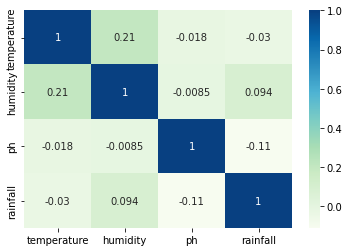

In [ ]:
#Heatmap
sns.heatmap(crp_df.corr(),annot = True, cmap = 'GnBu')

In [ ]:
print(crp_df['rainfall'].nunique())
print(crp_df['rainfall'].min())
print(crp_df['rainfall'].max())

2200
20.21126747
298.5601175


In [ ]:
print(crp_df['rainfall'].nunique())
print(crp_df['rainfall'].min())
print(crp_df['rainfall'].max())

2200
20.21126747
298.5601175


In [ ]:
print(crp_df['ph'].nunique())
print(crp_df['ph'].min())
print(crp_df['ph'].max())

2200
3.504752314
9.93509073


In [ ]:
print(crp_df['humidity'].nunique())
print(crp_df['humidity'].min())
print(crp_df['humidity'].max())

2200
14.25803981
99.98187601


In [ ]:
print(crp_df['temperature'].nunique())
print(crp_df['temperature'].min())
print(crp_df['temperature'].max())

2200
8.825674745
43.67549305


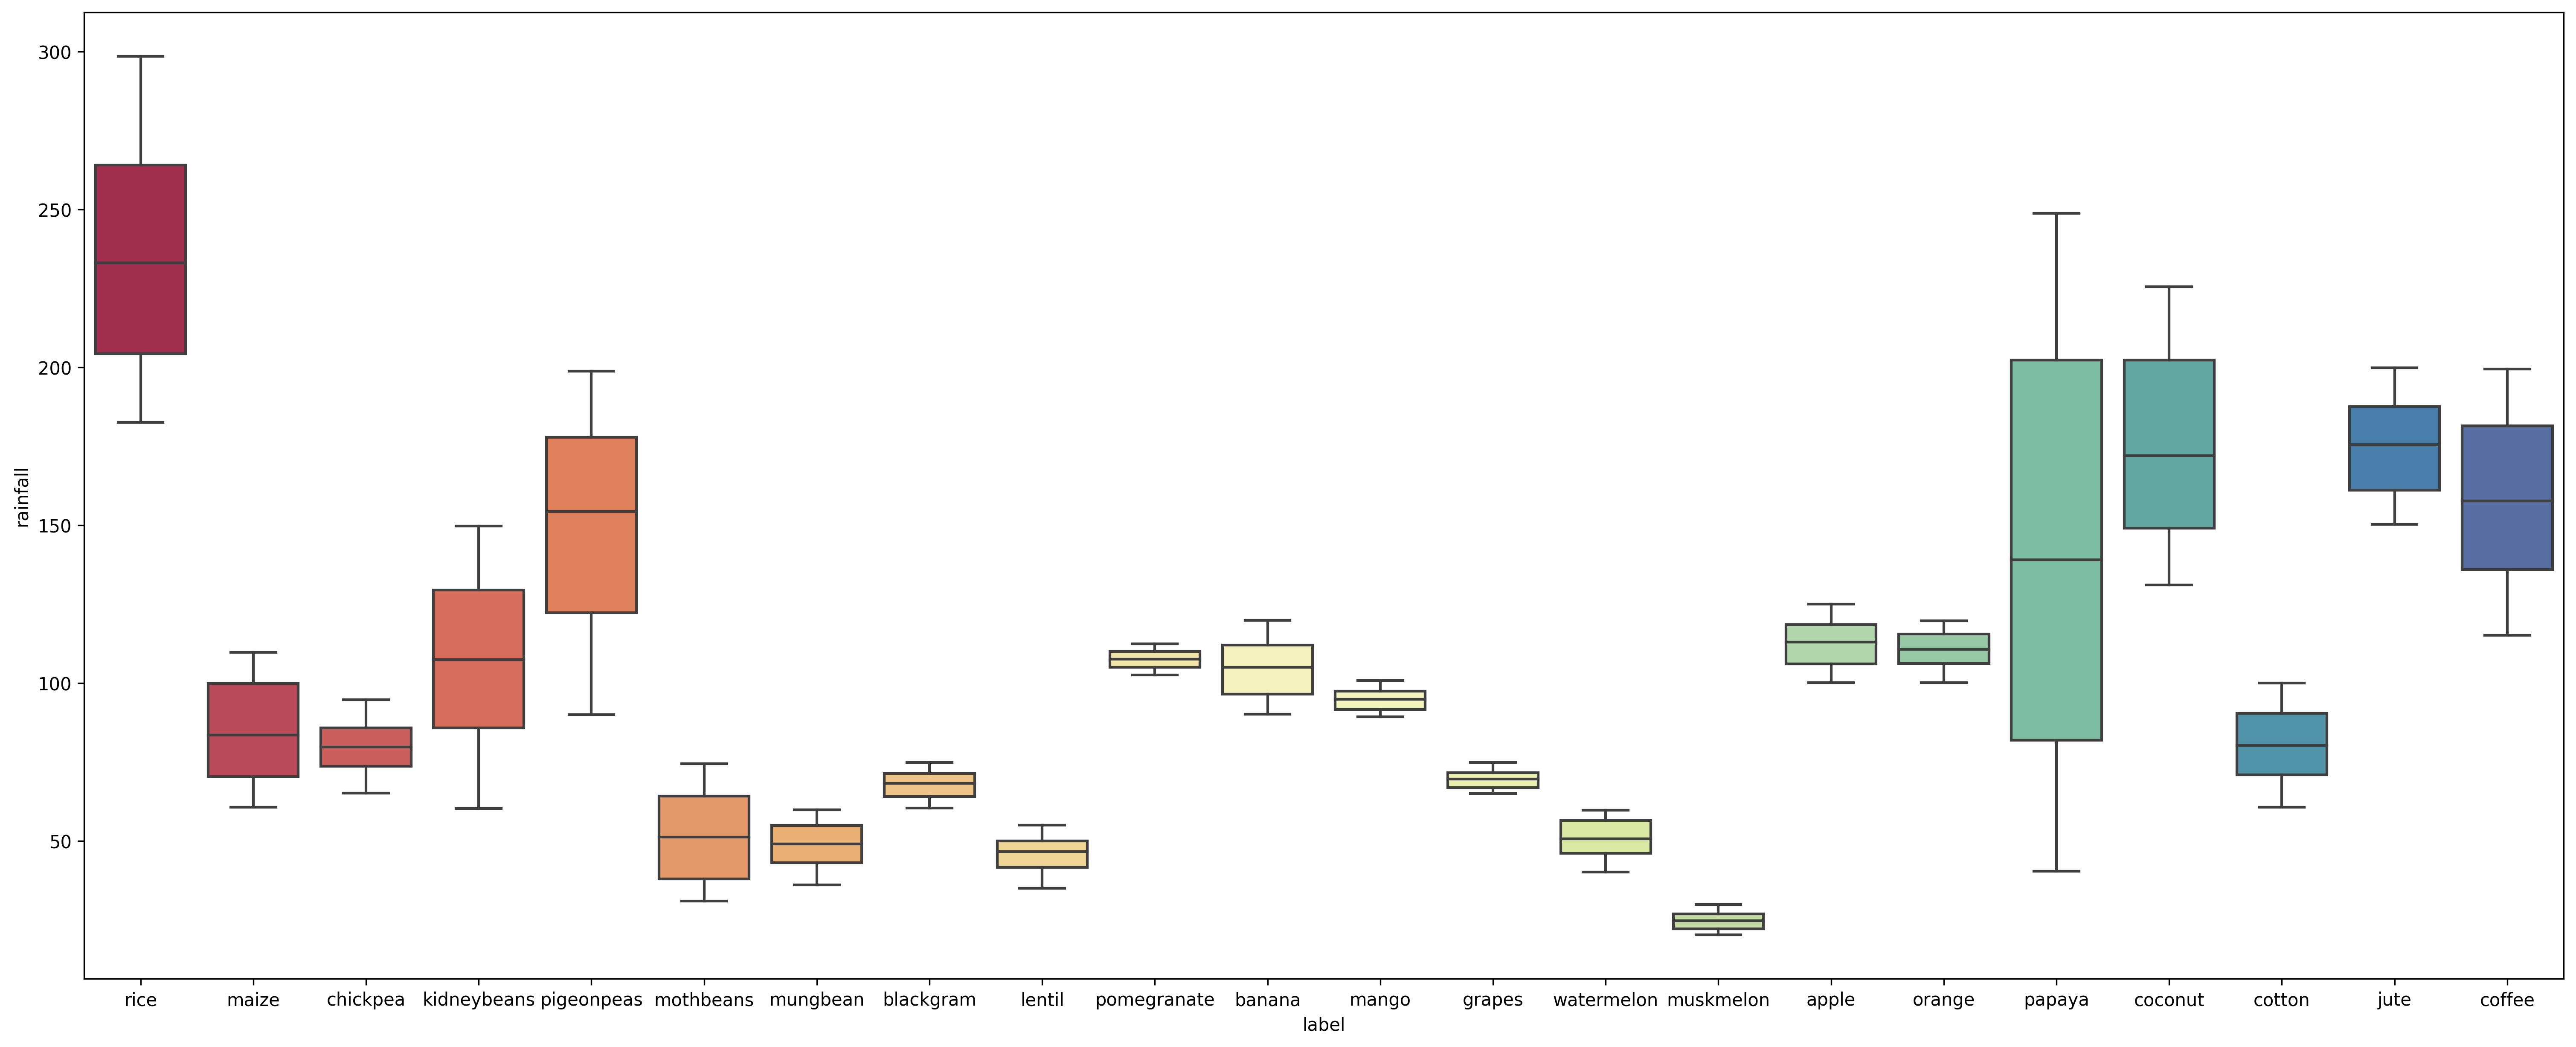

In [ ]:
fig, ax = plt.subplots(figsize=(25,10), dpi = 300)
sns.boxplot(x = 'label',y = 'rainfall',data = crp_df, palette = 'Spectral')

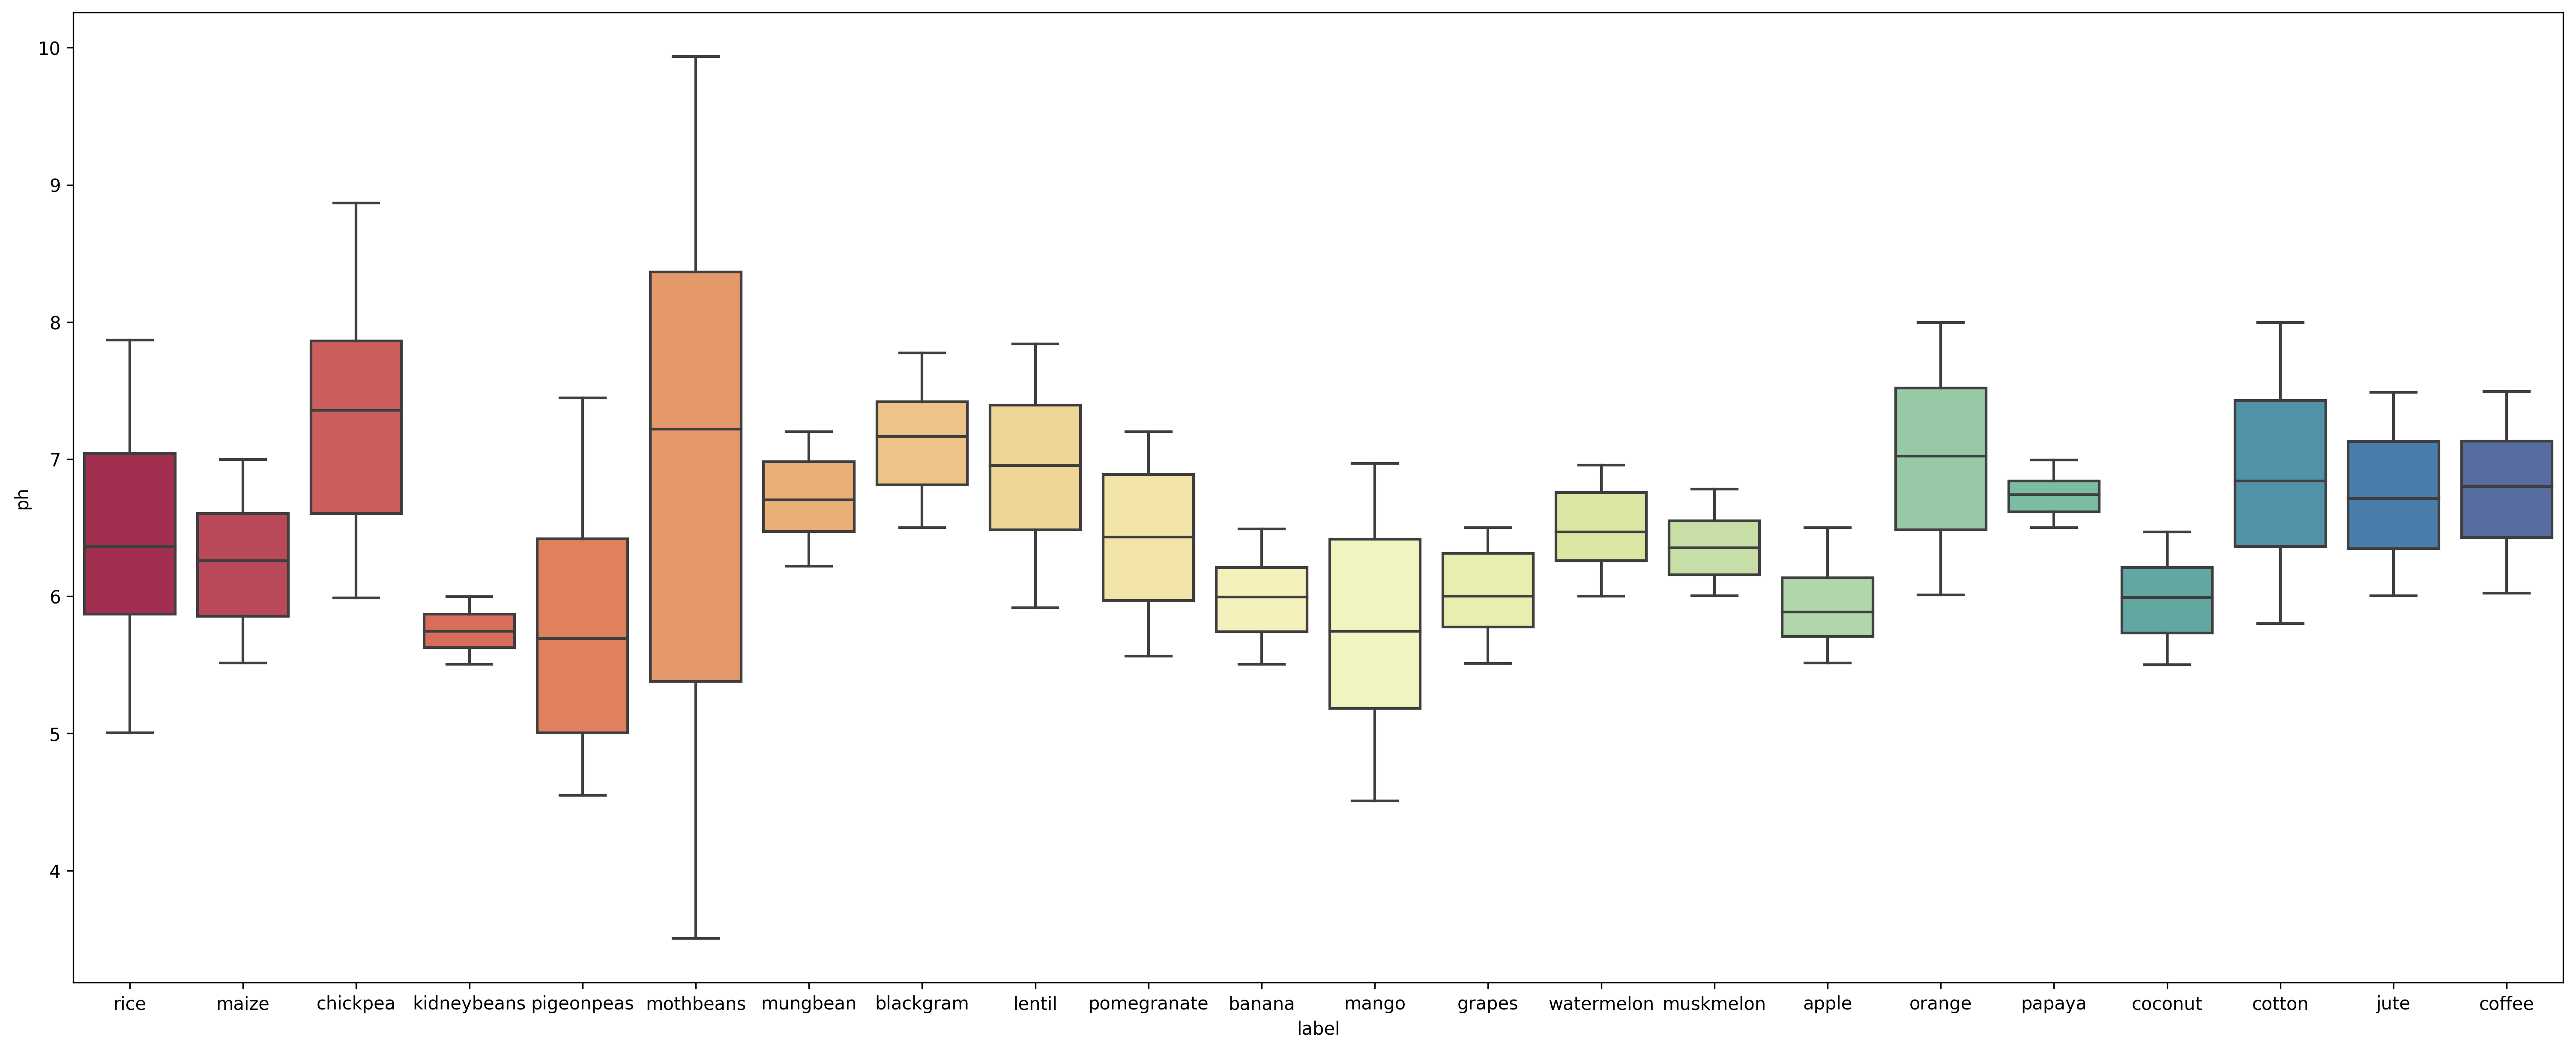

In [ ]:
fig, ax = plt.subplots(figsize=(25,10), dpi = 300)
sns.boxplot(x = 'label',y = 'ph',data = crp_df, palette = 'Spectral')

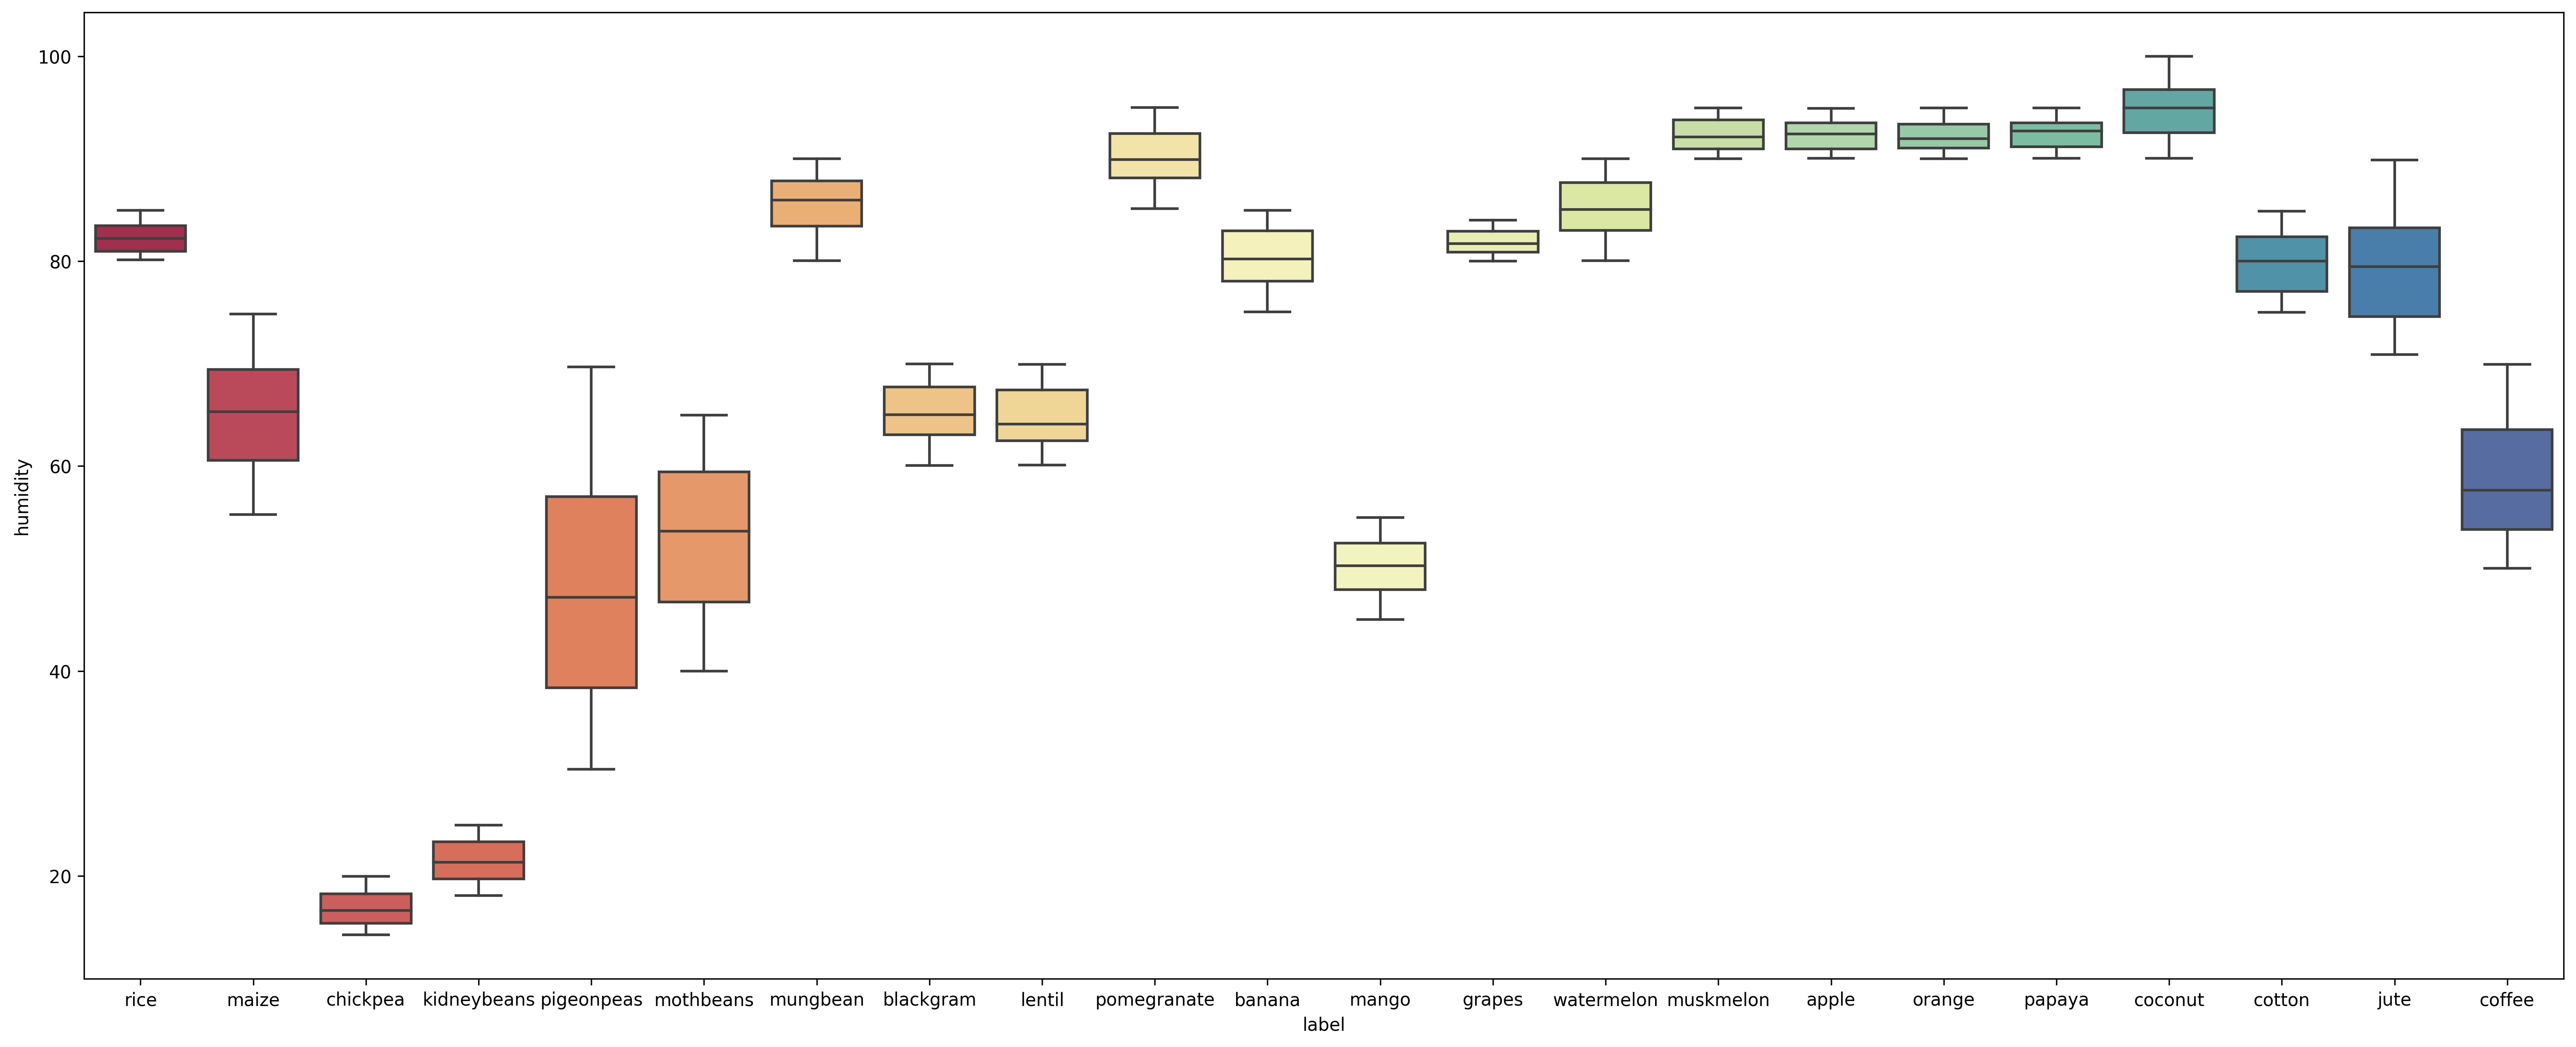

In [ ]:
fig, ax = plt.subplots(figsize=(25,10), dpi = 300)
sns.boxplot(x = 'label',y = 'humidity',data = crp_df, palette = 'Spectral')

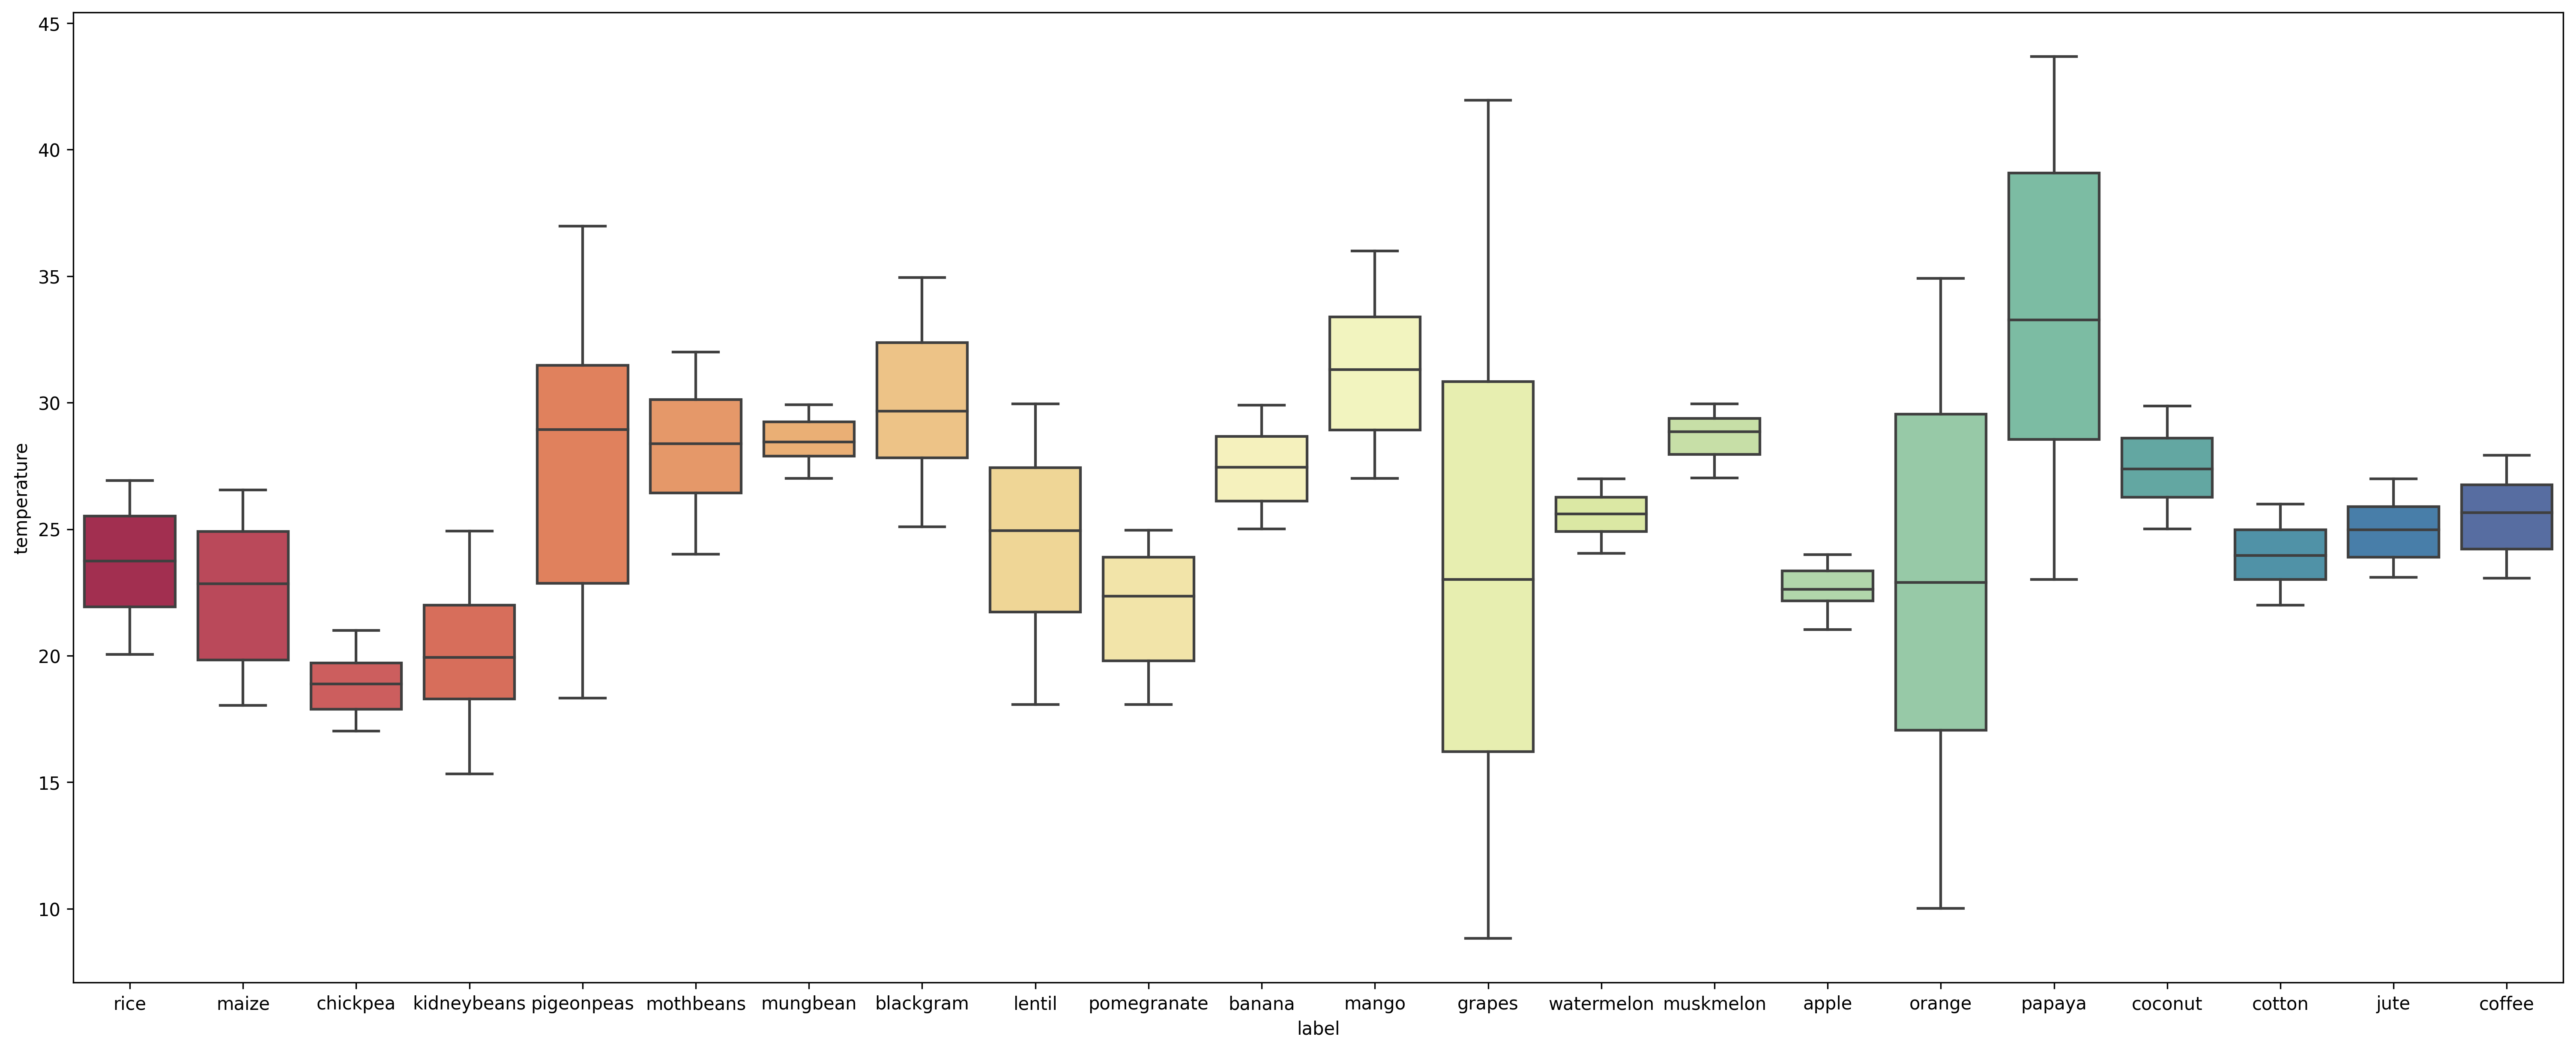

In [ ]:
fig, ax = plt.subplots(figsize=(25,10), dpi = 300)
sns.boxplot(x = 'label',y = 'temperature',data = crp_df, palette = 'Spectral')

**Adding Randomness**

In [ ]:
import random
r_fert = fert_df
temp = pd.DataFrame(columns = ['N','P','K'])
for i in range(0,len(crp_df)):
    t_crp = crp_df.label.iloc[i]
    
    N = r_fert[r_fert['Crop'] == t_crp]["N"].iloc[0] + random.randint(-20,20)
    P = r_fert[r_fert['Crop'] == t_crp]["P"].iloc[0] + random.randint(-5,20)
    K = r_fert[r_fert['Crop'] == t_crp]["K"].iloc[0] + random.randint(-5,5)
    d = {"N":N,"P":P,"K":K}
    
    temp = temp.append(d,ignore_index = True)

**Merge Crop Fertilizer and Meteorological data**

In [ ]:
crp_df['N'] = temp['N']
crp_df['P'] = temp['P']
crp_df['K'] = temp['K']

In [ ]:
crp_df.head()

,temperature,humidity,ph,rainfall,label,N,P,K
0,20.879744,82.002744,6.502985,202.935536,rice,91,60,36
1,21.770462,80.319644,7.038096,226.655537,rice,70,53,37
2,23.004459,82.320763,7.840207,263.964248,rice,69,47,43
3,26.491096,80.158363,6.980401,242.864034,rice,71,43,41
4,20.130175,81.604873,7.628473,262.717340,rice,74,49,42


In [ ]:
crp_df = crp_df[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [ ]:
crp_df.to_csv('/content/gdrive/MyDrive/CRP_DATASET/crp_recommend.csv',index=False)

In [ ]:
# Read from newly created dataset to check
crp_final = pd.read_csv('/content/gdrive/MyDrive/CRP_DATASET/crp_recommend.csv')

In [ ]:
crp_final.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,91,60,36,20.879744,82.002744,6.502985,202.935536,rice
1,70,53,37,21.770462,80.319644,7.038096,226.655537,rice
2,69,47,43,23.004459,82.320763,7.840207,263.964248,rice
3,71,43,41,26.491096,80.158363,6.980401,242.864034,rice
4,74,49,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
crp_final

,N,P,K,temperature,humidity,ph,rainfall,label
0,91,60,36,20.879744,82.002744,6.502985,202.935536,rice
1,70,53,37,21.770462,80.319644,7.038096,226.655537,rice
2,69,47,43,23.004459,82.320763,7.840207,263.964248,rice
3,71,43,41,26.491096,80.158363,6.980401,242.864034,rice
4,74,49,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,95,25,27,26.774637,66.413269,6.780064,177.774507,coffee
2196,80,36,34,27.417112,56.636362,6.086922,127.924610,coffee
2197,90,35,32,24.131797,67.225123,6.362608,173.322839,coffee
2198,100,32,32,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
crp_final.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.208182,53.121818,48.141818,25.616244,71.481779,6.469480,103.463655
std,37.310008,32.595244,50.733545,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,19.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,85.000000,67.000000,48.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
# Check for null values
crp_final.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

There are no null values in the dataset

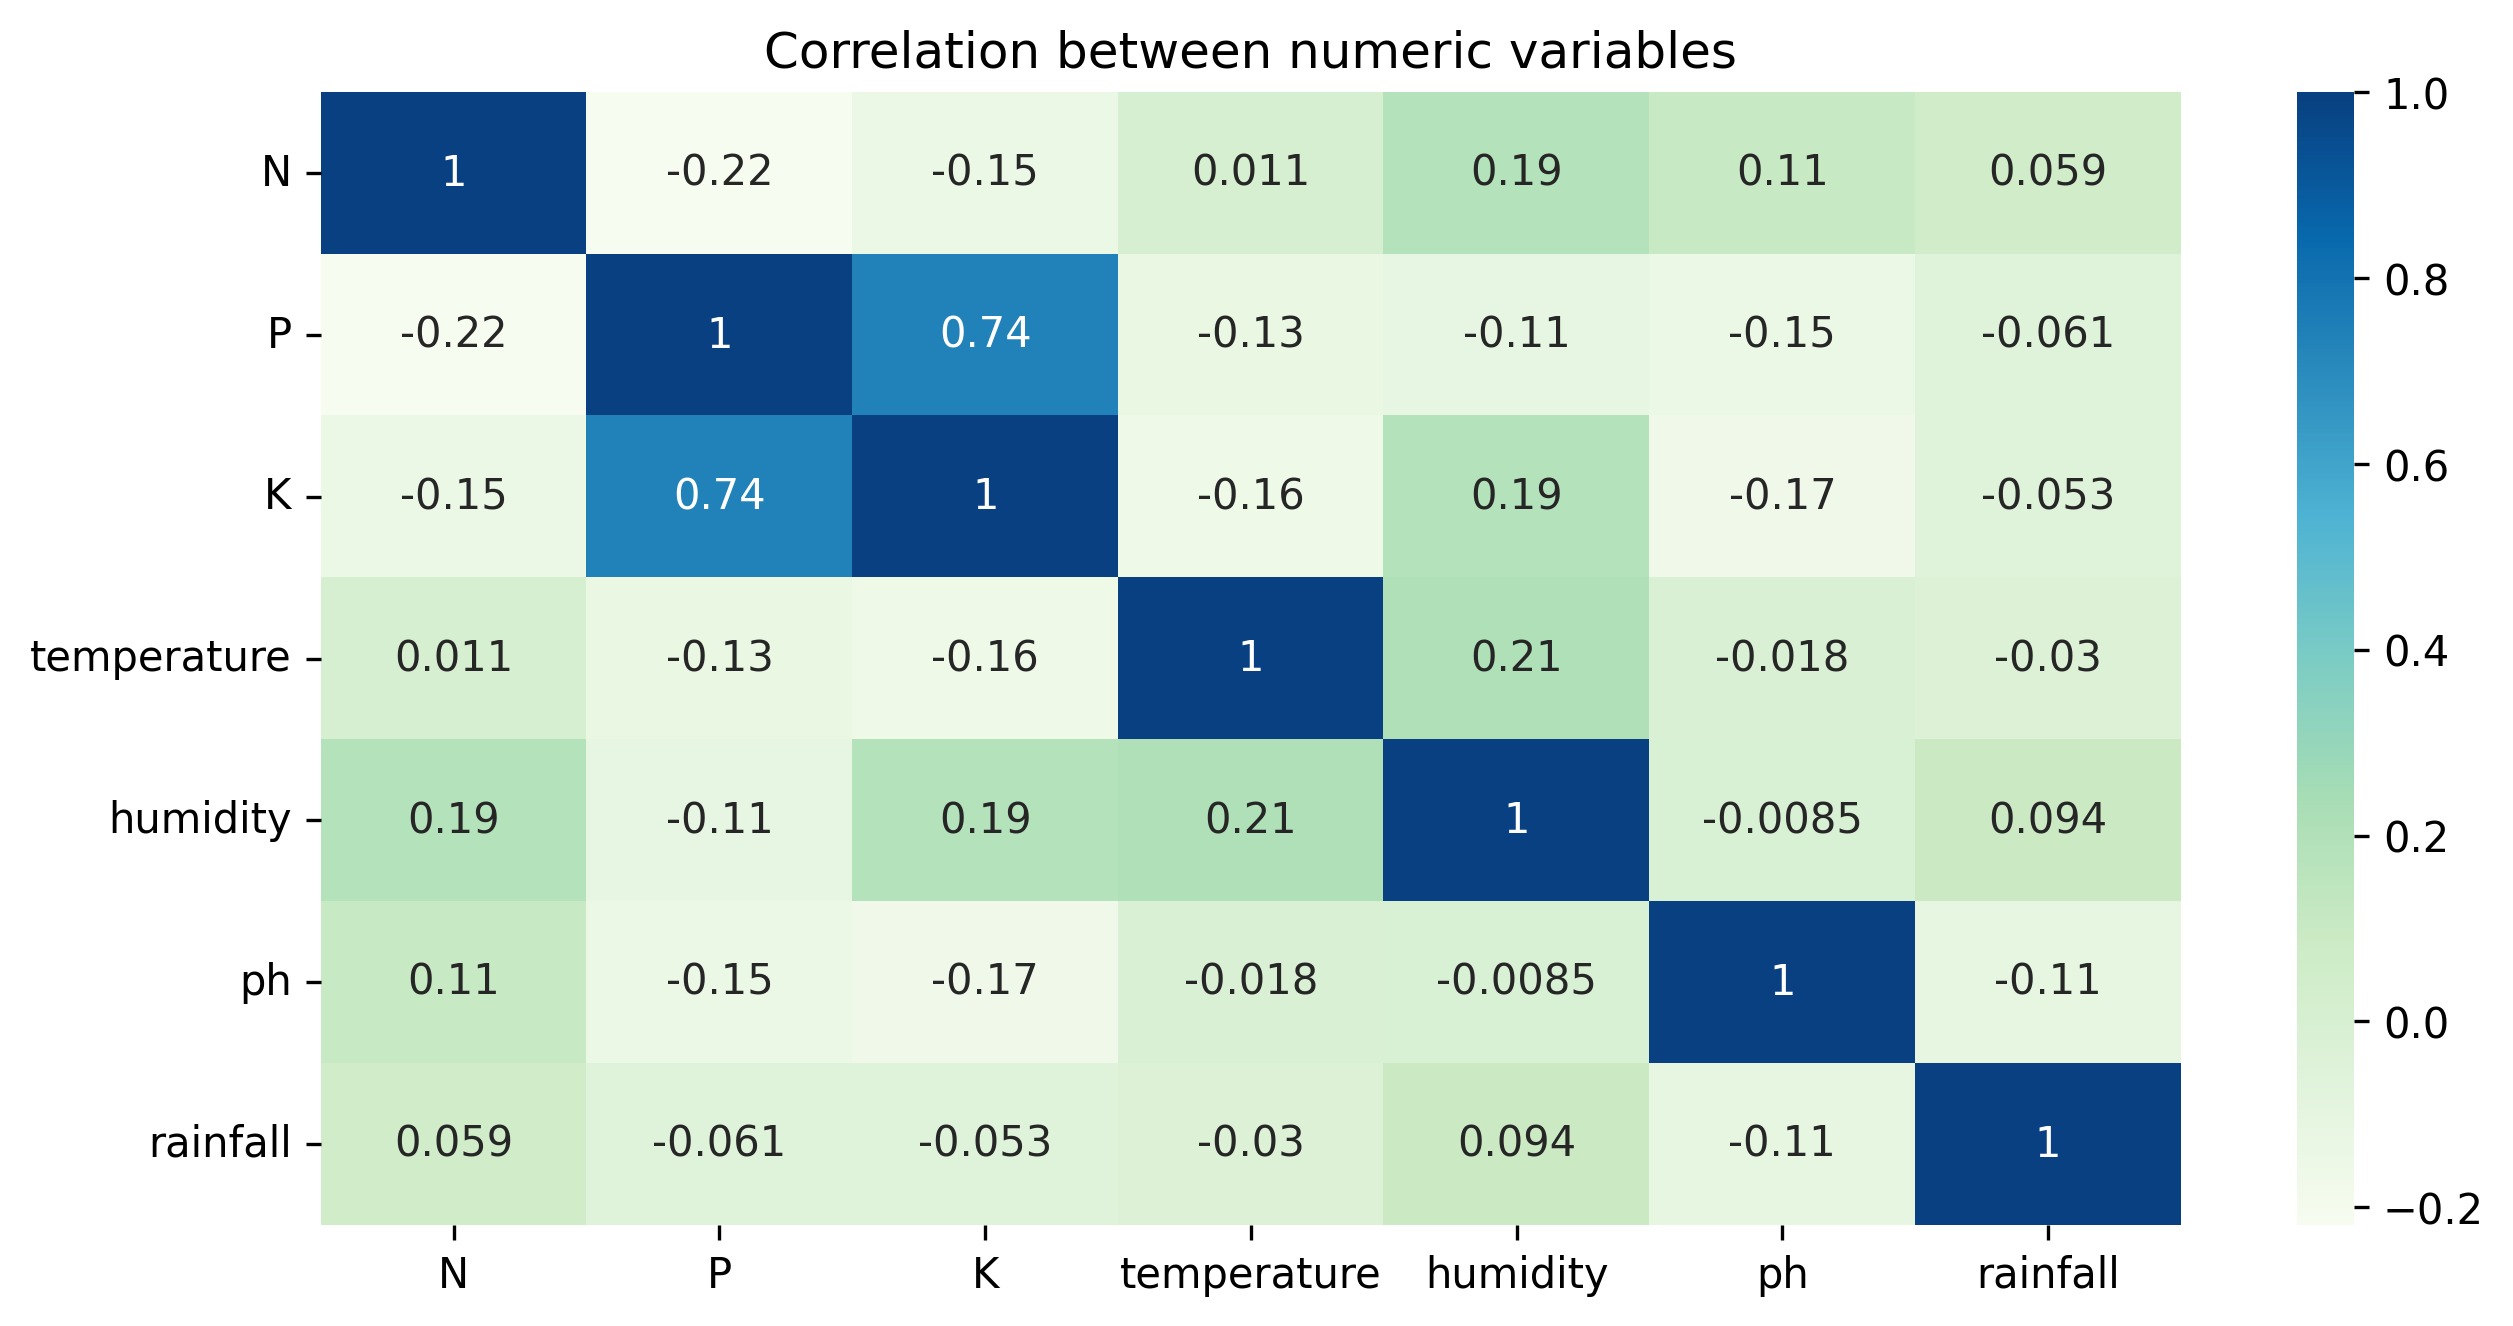

In [ ]:
#Heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi = 300)
sns.heatmap(crp_final.corr(),annot = True, cmap = 'GnBu')
plt.title('Correlation between numeric variables', fontsize = 12, c='black')
plt.show()

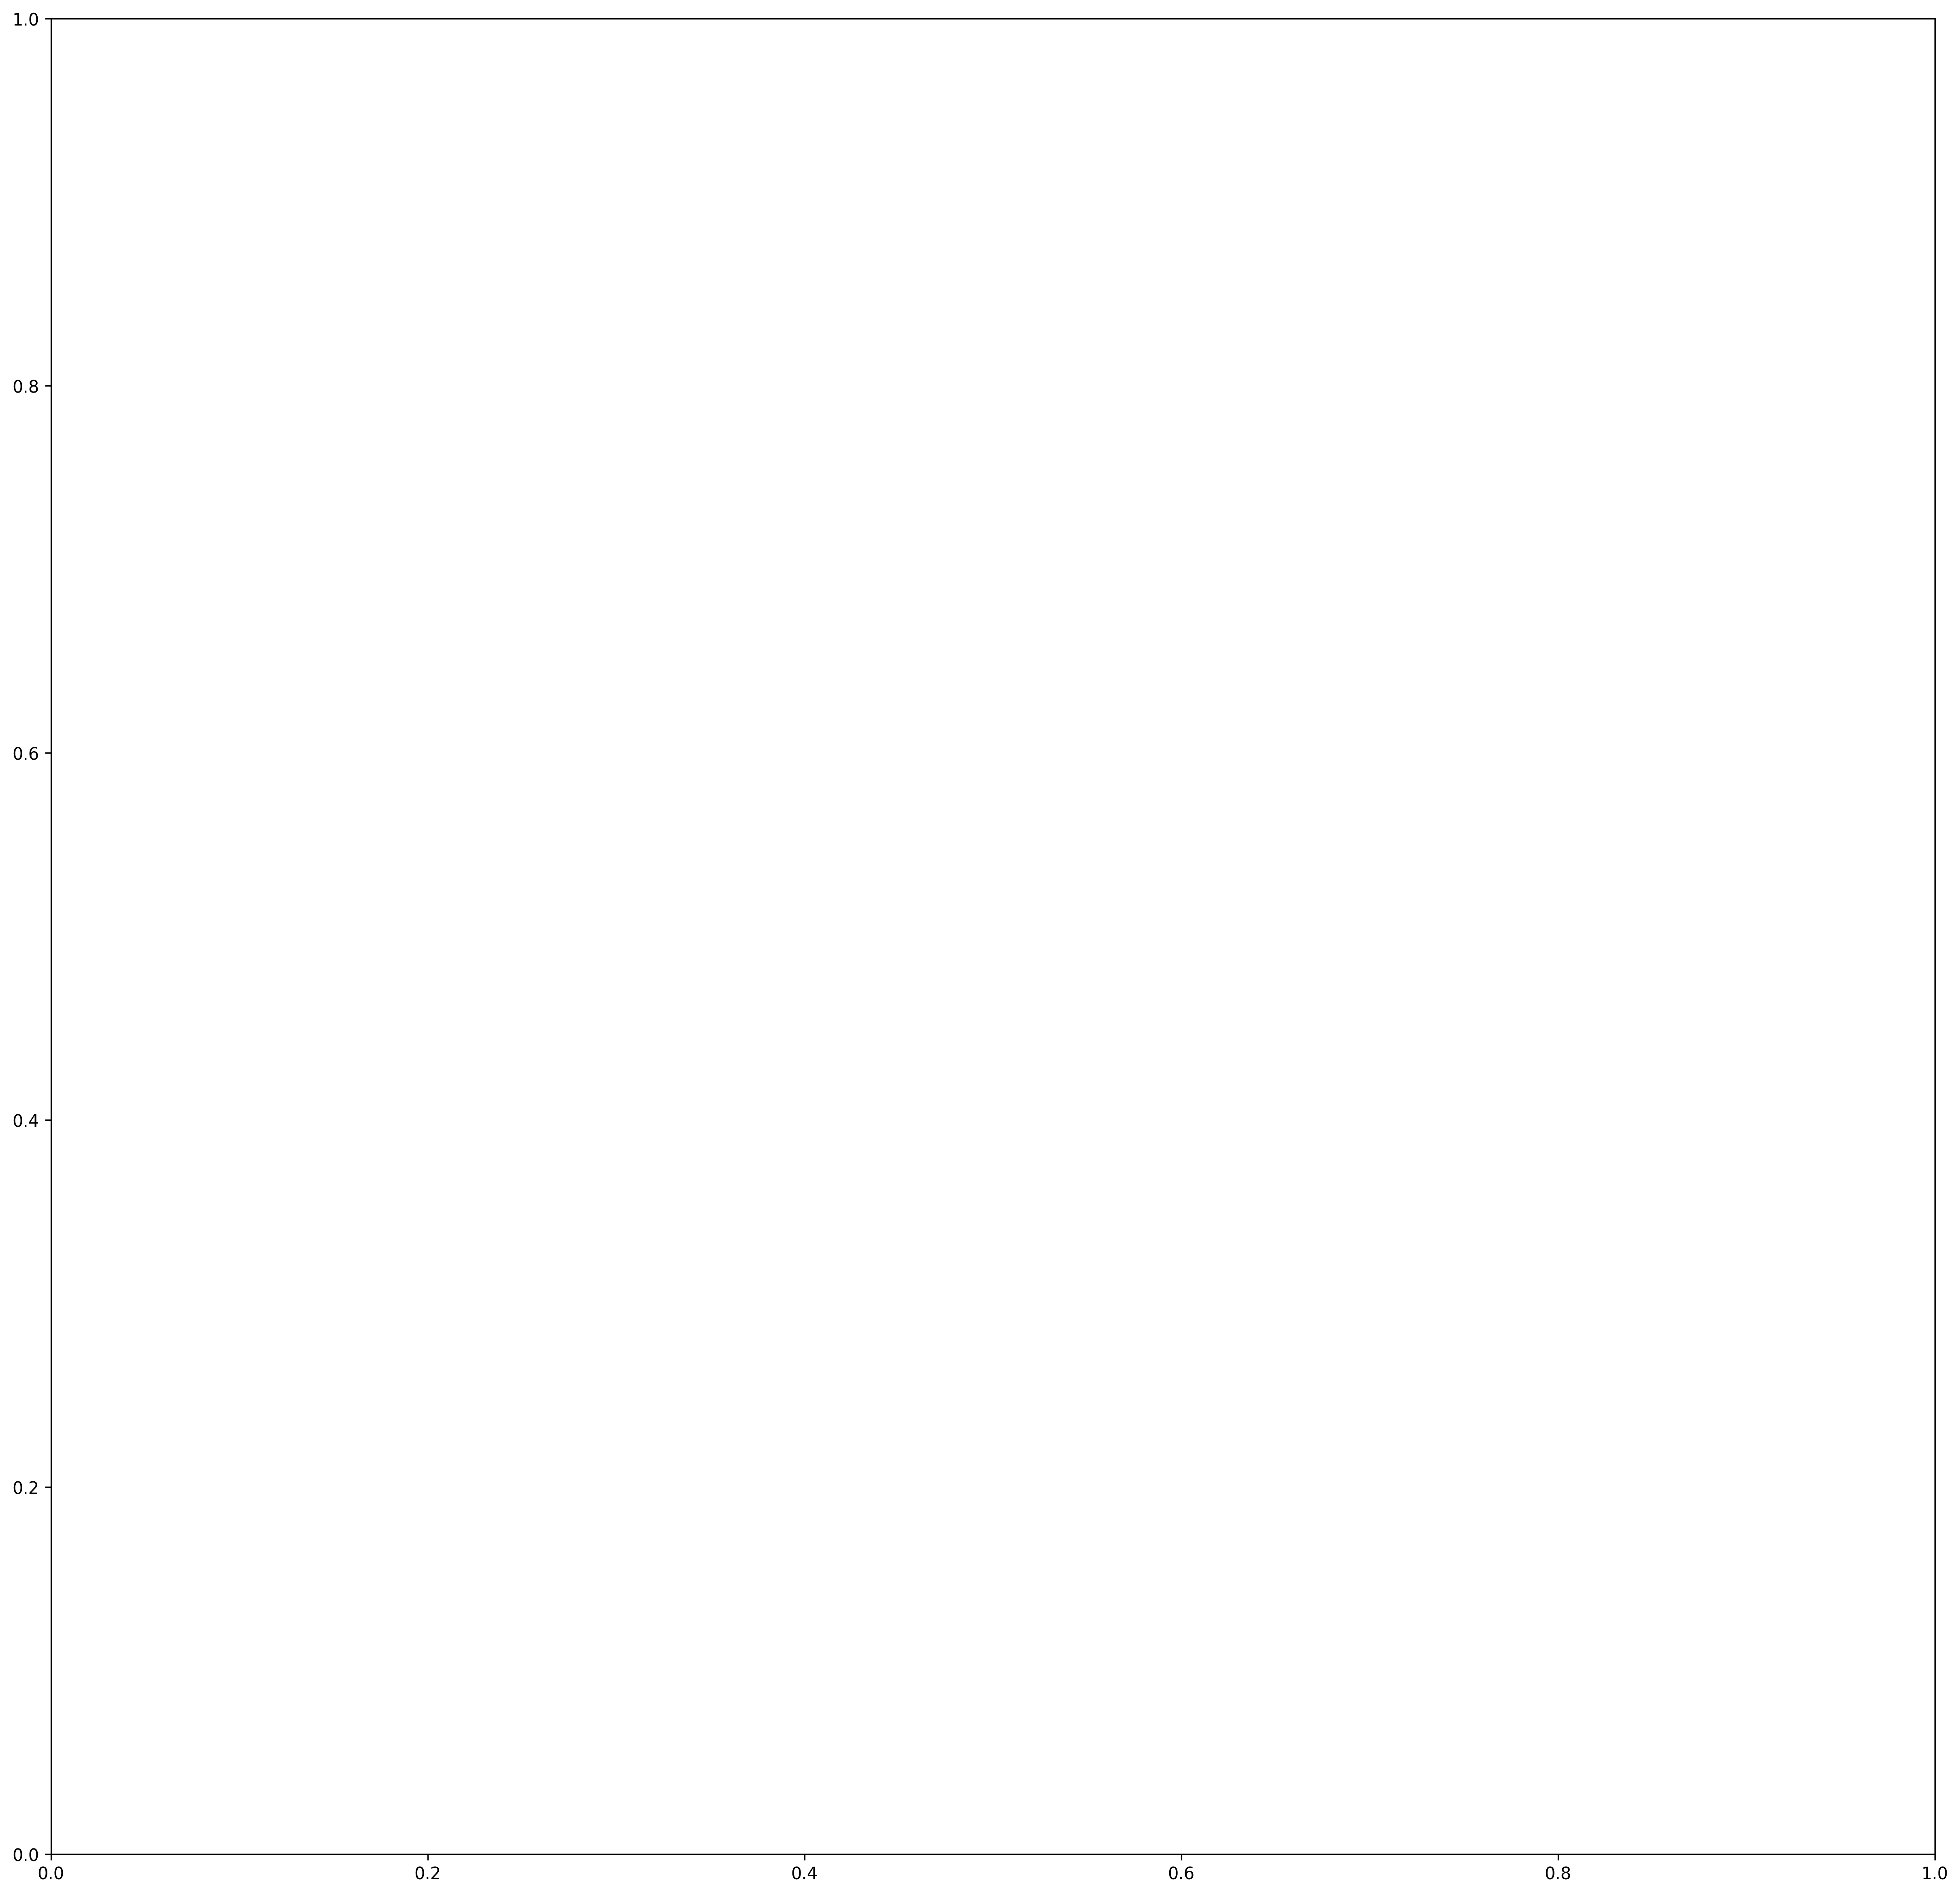

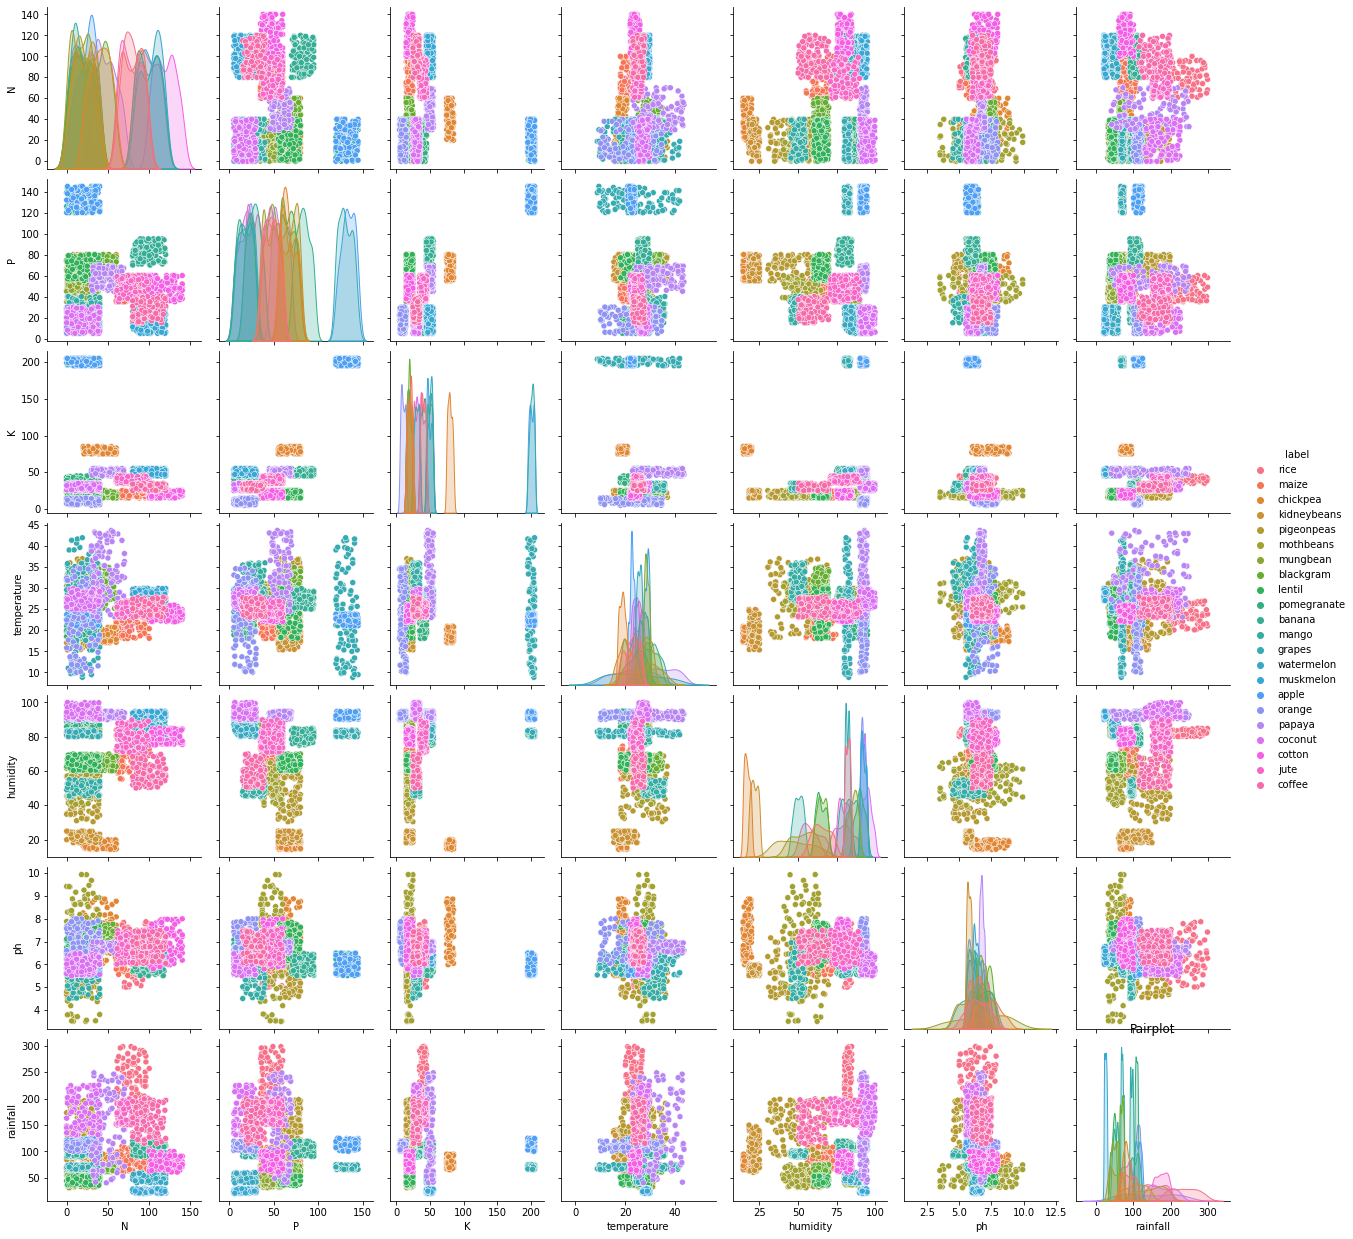

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20), dpi = 300)
sns.pairplot(crp_final,hue = 'label')
plt.title('Pairplot', fontsize = 12, c='black')
plt.show()

# Fitting Classification Models

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler  

from sklearn.neural_network import MLPClassifier 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as XGB
import pickle

In [ ]:
# Allocating dependent and independent variable
X = crp_final.drop(columns = 'label')
Y = crp_final.label

In [ ]:
# dividing X, y into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

**XGBoost Classifier**

In [ ]:
XB = XGB.XGBClassifier()

#Create ndarray of train and test
train_x = x_train.values
test_x = x_test.values

XB.fit(train_x, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
XB_pred_train = XB.predict(train_x)

XB_acc_train = accuracy_score(y_train, XB_pred_train)

print("XGBoost Train Accuracy is :", XB_acc_train)

XGBoost Train Accuracy is : 1.0


XGBoost Test Accuracy is : 0.9863636363636363
XGBoost Cross Validation Score is : [0.97272727 0.99318182 0.98863636 0.99090909 0.98863636]
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.92      0.86      0.89        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       0.95      1.00      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00       

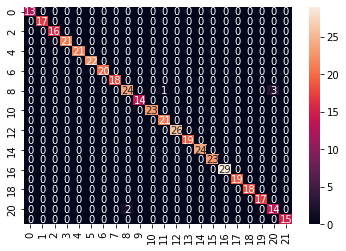

In [ ]:
XB_pred = XB.predict(test_x)

XB_acc = accuracy_score(y_test, XB_pred)
XB_cm = confusion_matrix(y_test, XB_pred)
# Cross validation score (XGBoost)
XB_cv_score = cross_val_score(XB, X, Y, cv=5)

print("XGBoost Test Accuracy is :", XB_acc)
print("XGBoost Cross Validation Score is :", XB_cv_score)
sns.heatmap(XB_cm, annot = True)
print(classification_report(y_test, XB_pred))

In [ ]:
# Hyperparameter Optimization

XB = XGB.XGBClassifier()

# Default-Run of default-hyperparameters
parameters = {'learning_rate': [0.1],
              'max_depth': [3],
              'min_child_weight': [1],
              'n_estimators': [100]}


cl_xgb = model_selection.GridSearchCV(estimator = XB,
                                       param_grid = parameters,
                                       n_jobs = -1,
                                       cv = 3,
                                       refit = True)

cl_xgb.fit(train_x, y_train)

GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [3],
                         'min_child_weight': [1], 'n_estimators': [100]})

In [ ]:
print(cl_xgb.best_params_)
print(cl_xgb.best_score_)
print(cl_xgb.best_estimator_)

{'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100}
0.9840883146986373
XGBClassifier(objective='multi:softprob')


In [ ]:
XB_pred = cl_xgb.predict(test_x)
XB_acc = accuracy_score(y_test, XB_pred)
#XB_cv_score = cross_val_score(cl_xgb, X, Y, cv=3)

print("XGBoost Test Accuracy is :", XB_acc)
#print("XGBoost Cross Validation Score is :", XB_cv_score)

XGBoost Test Accuracy is : 0.9863636363636363


In [ ]:
# 1st-Run for best hyperparameters
parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4],
              'max_depth': [2, 4, 6, 8],
              'min_child_weight': [1, 10, 20, 30],
              'n_estimators': [100, 200, 300]}


cl_xgb = model_selection.GridSearchCV(estimator = XB,
                                       param_grid = parameters,
                                       n_jobs = -1,
                                       cv = 3,
                                       refit = True)

cl_xgb.fit(train_x, y_train)

GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4],
                         'max_depth': [2, 4, 6, 8],
                         'min_child_weight': [1, 10, 20, 30],
                         'n_estimators': [100, 200, 300]})

In [ ]:
print(cl_xgb.best_params_)
print(cl_xgb.best_score_)
print(cl_xgb.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 200}
0.9892029234087829
XGBClassifier(learning_rate=0.3, max_depth=6, n_estimators=200,
              objective='multi:softprob')


In [ ]:
XB_pred = cl_xgb.predict(test_x)
XB_acc = accuracy_score(y_test, XB_pred)
#XB_cv_score = cross_val_score(cl_xgb, X, Y, cv=3)

print("XGBoost Test Accuracy is :", XB_acc)
#print("XGBoost Cross Validation Score is :", XB_cv_score)

XGBoost Test Accuracy is : 0.9886363636363636


In [ ]:
# 2nd-Run for best hyperparameters
parameters = {'learning_rate': [0.05, 0.1, 0.15, 0.2],
              'max_depth': [2, 3, 4],
              'min_child_weight': [1, 5, 10],
              'n_estimators': [100, 150, 200, 300, 400]}


cl_xgb = model_selection.GridSearchCV(estimator = XB,
                                       param_grid = parameters,
                                       n_jobs = -1,
                                       cv = 3,
                                       refit = True)

cl_xgb.fit(train_x, y_train)

GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2],
                         'max_depth': [2, 3, 4], 'min_child_weight': [1, 5, 10],
                         'n_estimators': [100, 150, 200, 300, 400]})

In [ ]:
print(cl_xgb.best_params_)
print(cl_xgb.best_score_)
print(cl_xgb.best_estimator_)

{'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 400}
0.9892048614946907
XGBClassifier(learning_rate=0.05, max_depth=2, n_estimators=400,
              objective='multi:softprob')


In [ ]:
XB_pred = cl_xgb.predict(test_x)
XB_acc = accuracy_score(y_test, XB_pred)
#XB_cv_score = cross_val_score(cl_xgb, X, Y, cv=3)

print("XGBoost Test Accuracy is :", XB_acc)
#print("XGBoost Cross Validation Score is :", XB_cv_score)

XGBoost Test Accuracy is : 0.990909090909091


In [ ]:
# 3rd-Run for best hyperparameters
parameters = {'learning_rate': [0.5, 0.1, 0.2, 0.25, 0.3],
              'max_depth': [1, 2, 3],
              'min_child_weight': [1, 2, 3],
              'n_estimators': [200, 400, 600]}


cl_xgb = model_selection.GridSearchCV(estimator = XB,
                                       param_grid = parameters,
                                       n_jobs = -1,
                                       cv = 3,
                                       refit = True)

cl_xgb.fit(train_x, y_train)

GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 0.1, 0.2, 0.25, 0.3],
                         'max_depth': [1, 2, 3], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [200, 400, 600]})

In [ ]:
print(cl_xgb.best_params_)
print(cl_xgb.best_score_)
print(cl_xgb.best_estimator_)

{'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 600}
0.9897746587515238
XGBClassifier(max_depth=1, n_estimators=600, objective='multi:softprob')


In [ ]:
XB_pred = cl_xgb.predict(test_x)
XB_acc = accuracy_score(y_test, XB_pred)
#XB_cv_score = cross_val_score(cl_xgb, X, Y, cv=3)

print("XGBoost Test Accuracy is :", XB_acc)
#print("XGBoost Cross Validation Score is :", XB_cv_score)

XGBoost Test Accuracy is : 0.9931818181818182


In [ ]:
# 4th-Run for best hyperparameters
parameters = {'learning_rate': [0.050, 0.075, 0.1, 0.15],
              'max_depth': [2, 3, 4, 5],
              'min_child_weight': [1, 2, 3],
              'n_estimators': [300,400,500]}


cl_xgb = model_selection.GridSearchCV(estimator = XB,
                                       param_grid = parameters,
                                       n_jobs = -1,
                                       cv = 3,
                                       refit = True)

cl_xgb.fit(train_x, y_train)

GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.075, 0.1, 0.15],
                         'max_depth': [2, 3, 4, 5],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': [300, 400, 500]})

In [ ]:
print(cl_xgb.best_params_)
print(cl_xgb.best_score_)
print(cl_xgb.best_estimator_)

{'learning_rate': 0.075, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 400}
0.9892058305376444
XGBClassifier(learning_rate=0.075, max_depth=2, min_child_weight=3,
              n_estimators=400, objective='multi:softprob')


In [ ]:
XB_pred = cl_xgb.predict(test_x)
XB_acc = accuracy_score(y_test, XB_pred)
#XB_cv_score = cross_val_score(cl_xgb, X, Y, cv=3)

print("XGBoost Test Accuracy is :", XB_acc)
#print("XGBoost Cross Validation Score is :", XB_cv_score)

XGBoost Test Accuracy is : 0.990909090909091


In [ ]:
# Last run for best hyperparameters
parameters = {'learning_rate': [0.5],
              'max_depth': [1],
              'min_child_weight': [3],
              'n_estimators': [200]}


cl_xgb = model_selection.GridSearchCV(estimator = XB,
                                       param_grid = parameters,
                                       n_jobs = -1,
                                       cv = 3,
                                       refit = True)

cl_xgb.fit(train_x, y_train)

GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.5], 'max_depth': [1],
                         'min_child_weight': [3], 'n_estimators': [200]})

XGBoost Accuracy is : 0.9886363636363636
XGBoost Cross Validation Score is : [0.98863636 0.98295455 0.98579545 0.98295455 0.99431818]
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.87      0.96      0.92        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
 

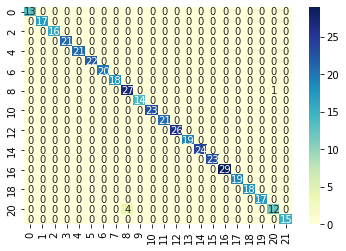

In [ ]:
XB_pred = cl_xgb.predict(test_x)

XB_acc = accuracy_score(y_test, XB_pred)
XB_cm = confusion_matrix(y_test, XB_pred)
# Cross validation score (XGBoost)
XB_cv_score = cross_val_score(cl_xgb, train_x, y_train, cv=5)

print("XGBoost Accuracy is :", XB_acc)
print("XGBoost Cross Validation Score is :", XB_cv_score)
sns.heatmap(XB_cm, annot = True, cmap = 'YlGnBu')
print(classification_report(y_test, XB_pred))

In [ ]:
# Dump the trained XGBoost Model with Pickle
XGB_pkl_filename = '/content/gdrive/MyDrive/CROP_RECOM_MODEL/XGBoostTuned.pkl'
# Open the file to save as pkl file
XGB_pkl = open(XGB_pkl_filename, 'wb')
pickle.dump(cl_xgb, XGB_pkl)
# Close the pickle instances
XGB_pkl.close()

**MultiLayer Perceptron**

In [ ]:
# Transforming categorial 'label' variable into numerical
Y_2 = crp_final.select_dtypes(include=[object])  

LE = preprocessing.LabelEncoder()
Y_MLP = Y_2.apply(LE.fit_transform)

In [ ]:
# Train and test split (80% of  dataset into  training set and  other 20% into test data)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_MLP, test_size = 0.20) 

In [ ]:
# Feature scaling
scaler = StandardScaler()  
scaler.fit(X_train)
x_train_new = scaler.transform(X_train)  
x_test_new = scaler.transform(X_test)  

In [ ]:
MLP = MLPClassifier()  
MLP.fit(x_train_new, Y_train.values.ravel()) 

MLP

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

MultiLayer Perceptron Accuracy is : 0.9840909090909091
MultiLayer Perceptron Cross Validation Score is : [0.96363636 0.96590909 0.93863636 0.97727273 0.96590909]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        13
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        19
           8       0.91      0.97      0.94        31
           9       0.96      1.00      0.98        22
          10       0.94      1.00      0.97        16
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        16
          13       1.00      0.96      0.98        24
          14       1.00    

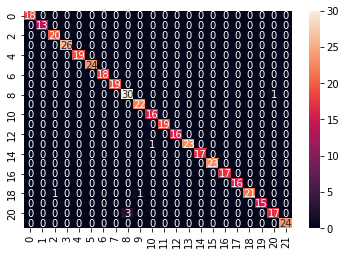

In [ ]:
MLP_pred = MLP.predict(x_test_new) 

MLP_acc = accuracy_score(Y_test, MLP_pred)
MLP_cm = confusion_matrix(Y_test, MLP_pred)
# Cross validation score (XGBoost)
MLP_cv_score = cross_val_score(MLP, X, Y_2, cv=5)

print("MultiLayer Perceptron Accuracy is :", MLP_acc)
print("MultiLayer Perceptron Cross Validation Score is :", MLP_cv_score)
sns.heatmap(MLP_cm, annot = True)
print(classification_report(Y_test, MLP_pred))

**Hyperparameter Tuning**

In [ ]:
#1st Run
check_parameters = {
    'hidden_layer_sizes': [(50,50), (100,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
cl_MLP = model_selection.GridSearchCV(MLP, check_parameters, n_jobs=-1, cv=3)
cl_MLP.fit(x_train_new, Y_train.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50), (100, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [ ]:
print('Best parameters found:\n', cl_MLP.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [ ]:
MLP_pred = cl_MLP.predict(x_test_new) 

MLP_acc = accuracy_score(Y_test, MLP_pred)

print("MultiLayer Perceptron Accuracy is :", MLP_acc)

MultiLayer Perceptron Accuracy is : 0.975


In [ ]:
#2nd Run
check_parameters = {
    'hidden_layer_sizes': [(100,50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['lbfgs'],
    'alpha': [0.00001, 0.0001],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
cl_MLP = model_selection.GridSearchCV(MLP, check_parameters, n_jobs=-1, cv=3)
cl_MLP.fit(x_train_new, Y_train.values.ravel())

GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [1e-05, 0.0001],
                         'hidden_layer_sizes': [(100, 50), (100, 100)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['lbfgs']})

In [ ]:
print('Best parameters found:\n', cl_MLP.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}


In [ ]:
MLP_pred = cl_MLP.predict(x_test_new) 

MLP_acc = accuracy_score(Y_test, MLP_pred)

print("MultiLayer Perceptron Accuracy is :", MLP_acc)

MultiLayer Perceptron Accuracy is : 0.9704545454545455


In [ ]:
#Final Run
check_parameters = {
    'hidden_layer_sizes': [(50,50), (100,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
cl_MLP = model_selection.GridSearchCV(MLP, check_parameters, n_jobs=-1, cv=3)
cl_MLP.fit(x_train_new, Y_train.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50), (100, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [ ]:
print('Best parameters found:\n', cl_MLP.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conve

MultiLayer Perceptron Accuracy is : 0.9818181818181818
MultiLayer Perceptron Cross Validation Score is : [0.97159091 0.98011364 0.97727273 0.98295455 0.99715909]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        13
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        19
           8       0.93      0.90      0.92        31
           9       0.96      1.00      0.98        22
          10       0.94      1.00      0.97        16
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        16
          13       1.00      0.92      0.96        24
          14       1.00    

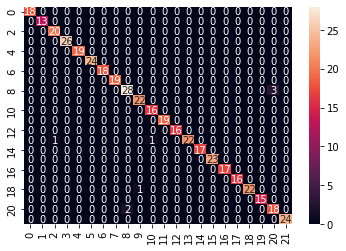

In [ ]:
MLP_pred = cl_MLP.predict(x_test_new) 

MLP_acc = accuracy_score(Y_test, MLP_pred)

MLP_cm = confusion_matrix(Y_test, MLP_pred)
# Cross validation score (XGBoost)
MLP_cv_score = cross_val_score(cl_MLP, x_train_new, Y_train, cv=5)

print("MultiLayer Perceptron Accuracy is :", MLP_acc)
print("MultiLayer Perceptron Cross Validation Score is :", MLP_cv_score)
sns.heatmap(MLP_cm, annot = True)
print(classification_report(Y_test, MLP_pred))

In [ ]:
# Dump the trained MLP Model with Pickle
MLP_pkl_filename = '/content/gdrive/MyDrive/CROP_RECOM_MODEL/MLPtuned.pkl'
# Open the file to save as pkl file
MLP_pkl = open(MLP_pkl_filename, 'wb')
pickle.dump(cl_MLP, MLP_pkl)
# Close the pickle instances
MLP_pkl.close()

**Ensemble Model**

Decision Tree Train Accuracy is : 1.0
Decision Tree Test Accuracy is : 0.9840909090909091
Decision Tree Cross Validation Score is : [0.99545455 0.97727273 0.98636364 0.98636364 0.99318182]
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.87      0.96      0.92        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      0.91      0.95        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.90      1.00      0.95        19


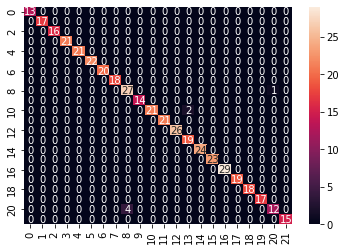

In [ ]:
# Decision Tree (Default)

DT = DecisionTreeClassifier()

DT.fit(x_train,y_train)

DT_pred_train = DT.predict(x_train)
DT_pred = DT.predict(x_test)

DT_acc_train = accuracy_score(y_train, DT_pred_train)
DT_acc = accuracy_score(y_test, DT_pred)
DT_cm = confusion_matrix(y_test, DT_pred)
# Cross validation score
DT_cv_score = cross_val_score(DT, x_train, y_train, cv=5)

print("Decision Tree Train Accuracy is :", DT_acc_train)
print("Decision Tree Test Accuracy is :", DT_acc)
print("Decision Tree Cross Validation Score is :", DT_cv_score)
sns.heatmap(DT_cm, annot = True)
print(classification_report(y_test, DT_pred))

**Hyperparameter Tuning**

In [ ]:
# 1st run - Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [ ]:
# Instantiate the grid search model
cl_DT = model_selection.GridSearchCV(estimator = DT, 
                           param_grid = params, 
                           cv = 5, n_jobs = -1, verbose = 1, scoring = "accuracy")

In [ ]:
cl_DT.fit(x_train,y_train)

DT_pred = cl_DT.predict(x_test)

DT_acc = accuracy_score(y_test, DT_pred)

print("Decision Tree Test Accuracy is :", DT_acc)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Decision Tree Test Accuracy is : 0.9863636363636363


In [ ]:
cl_DT.best_params_

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5}

In [ ]:
# 2nd run - Create the parameter grid based on the results of random search 
params = {
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [4, 5, 10],
    'criterion': ["gini"]
}

In [ ]:
# Instantiate the grid search model
cl_DT = model_selection.GridSearchCV(estimator = DT, 
                           param_grid = params, 
                           cv = 5, n_jobs = -1, verbose = 1, scoring = "accuracy")

In [ ]:
cl_DT.fit(x_train,y_train)

DT_pred = cl_DT.predict(x_test)

DT_acc = accuracy_score(y_test, DT_pred)

print("Decision Tree Test Accuracy is :", DT_acc)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Decision Tree Test Accuracy is : 0.9886363636363636


In [ ]:
cl_DT.best_estimator_

DecisionTreeClassifier(max_depth=30, min_samples_leaf=4)

In [ ]:
#2ND RUN
params = {
    'max_depth': [10, 15, 20, 25],
    'min_samples_leaf': [2, 5, 7, 10],
    'criterion': ["gini"]
}

In [ ]:
cl_DT = model_selection.GridSearchCV(estimator = DT, 
                           param_grid = params, 
                           cv = 5, n_jobs = -1, verbose = 1, scoring = "accuracy")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Decision Tree Test Accuracy is : 0.9840909090909091
Decision Tree Cross Validation Score is : [0.99545455 0.975      0.98181818 0.98181818 0.99318182]
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.87      0.96      0.92        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      0.91      0.95        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.90      1.

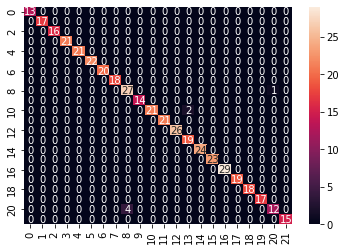

In [ ]:
cl_DT.fit(x_train,y_train)

DT_pred = cl_DT.predict(x_test)

DT_acc = accuracy_score(y_test, DT_pred)

print("Decision Tree Test Accuracy is :", DT_acc)

In [ ]:
cl_DT.best_estimator_

DecisionTreeClassifier(max_depth=15, min_samples_leaf=2)

In [ ]:
#Final RUN
params = {
    'max_depth': [25, 30, 50],
    'min_samples_leaf': [2, 5, 7, 10],
    'criterion': ["gini"]
}

In [ ]:
cl_DT = model_selection.GridSearchCV(estimator = DT, 
                           param_grid = params, 
                           cv = 5, n_jobs = -1, verbose = 1, scoring = "accuracy")

In [ ]:
cl_DT.fit(x_train,y_train)

DT_pred = cl_DT.predict(x_test)

DT_acc = accuracy_score(y_test, DT_pred)

print("Decision Tree Test Accuracy is :", DT_acc)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Decision Tree Test Accuracy is : 0.9863636363636363


In [ ]:
cl_DT.best_estimator_

DecisionTreeClassifier(max_depth=50, min_samples_leaf=2)

In [ ]:
#Final RUN
params = {
    'max_depth': [30],
    'min_samples_leaf': [2],
    'criterion': ["gini"]
}

In [ ]:
cl_DT = model_selection.GridSearchCV(estimator = DT, 
                           param_grid = params, 
                           cv = 5, n_jobs = -1, verbose = 1, scoring = "accuracy")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Decision Tree Test Accuracy is : 0.9840909090909091
Decision Tree Cross Validation Score is : [0.98579545 0.99715909 0.99431818 0.97727273 0.98295455]
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.87      0.96      0.92        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      0.91      0.95        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.90      1.00

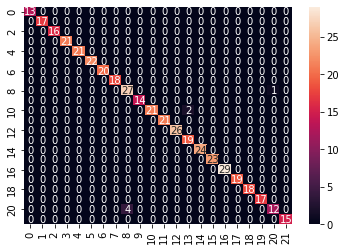

In [ ]:
cl_DT.fit(x_train,y_train)

DT_pred = DT.predict(x_test)

DT_acc = accuracy_score(y_test, DT_pred)
DT_cm = confusion_matrix(y_test, DT_pred)
DT_cv_score = cross_val_score(DT, x_train, y_train, cv=5)

print("Decision Tree Test Accuracy is :", DT_acc)
print("Decision Tree Cross Validation Score is :", DT_cv_score)
sns.heatmap(DT_cm, annot = True)
print(classification_report(y_test, DT_pred))

In [ ]:
# Dump the trained Decision Tree Model with Pickle
DT_pkl_filename = '/content/gdrive/MyDrive/CROP_RECOM_MODEL/DTtuned.pkl'
# Open the file to save as pkl file
DT_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(cl_DT, DT_pkl)
# Close the pickle instances
DT_pkl.close()

## **Random Forest**




Random Forest Train Accuracy is : 1.0
Random Forest Test Accuracy is : 0.990909090909091
Random Forest Cross Validation Score is : [0.99431818 0.99715909 0.99431818 0.99431818 0.99715909]
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
 

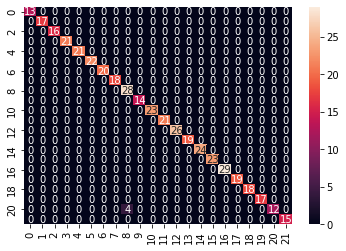

In [ ]:
# Random Forest default model

RF = RandomForestClassifier(random_state = 42)
RF.fit(x_train,y_train)

RF_pred_train = RF.predict(x_train)
RF_pred = RF.predict(x_test)

RF_acc_train = accuracy_score(y_train, RF_pred_train)
RF_acc = accuracy_score(y_test, RF_pred)
RF_cm = confusion_matrix(y_test, RF_pred)
# Cross validation score
RF_cv_score = cross_val_score(RF, x_train,y_train, cv=5)

print("Random Forest Train Accuracy is :", RF_acc_train)
print("Random Forest Test Accuracy is :", RF_acc)
print("Random Forest Cross Validation Score is :", RF_cv_score)
sns.heatmap(RF_cm, annot = True)
print(classification_report(y_test, RF_pred))

**Hyperparameter Tuning**

In [ ]:
# 1st Run - Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10,15],
    'max_features': [2, 3],
    'min_samples_leaf': [1,2,3, 4, 5,6],
    'min_samples_split': [2,3,4,5,6],
    'n_estimators': [100,200,500]
}

# Instantiate the grid search model
cl_RF = model_selection.GridSearchCV(estimator = RF, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
cl_RF.fit(x_train,y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 15],
                         'max_features': [2, 3],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [ ]:
RF_pred = cl_RF.predict(x_test)

RF_acc = accuracy_score(y_test, RF_pred)

print("Decision Tree Test Accuracy is :", RF_acc)

Decision Tree Test Accuracy is : 0.990909090909091


In [ ]:
cl_RF.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=15, max_features=3,
                       min_samples_split=3, n_estimators=200, random_state=42)

In [ ]:
# 2nd Run
param_grid = {
    'bootstrap': [False],
    'max_depth': [5,10],
    'max_features': [1,2, 3],
    'min_samples_leaf': [2,4,6],
    'min_samples_split': [2,4,8],
    'n_estimators': [200,500,1000]
}

# Instantiate the grid search model
cl_RF = model_selection.GridSearchCV(estimator = RF, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
cl_RF.fit(x_train,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [5, 10],
                         'max_features': [1, 2, 3],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [200, 500, 1000]},
             verbose=2)

In [ ]:
RF_pred = cl_RF.predict(x_test)

RF_acc = accuracy_score(y_test, RF_pred)

print("Decision Tree Test Accuracy is :", RF_acc)

Decision Tree Test Accuracy is : 0.990909090909091


In [ ]:
cl_RF.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=10, max_features=2,
                       min_samples_leaf=2, n_estimators=1000, random_state=42)

In [ ]:
# 3rd Run
param_grid = {
    'bootstrap': [False],
    'max_depth': [10,15],
    'max_features': [2, 3],
    'min_samples_leaf': [2],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [1000, 2000, 3000]
}

# Instantiate the grid search model
cl_RF = model_selection.GridSearchCV(estimator = RF, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
cl_RF.fit(x_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [10, 15],
                         'max_features': [2, 3], 'min_samples_leaf': [2],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [1000, 2000, 3000]},
             verbose=2)

In [ ]:
RF_pred = cl_RF.predict(x_test)

RF_acc = accuracy_score(y_test, RF_pred)

print("Decision Tree Test Accuracy is :", RF_acc)

Decision Tree Test Accuracy is : 0.990909090909091


In [ ]:
cl_RF.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=10, max_features=2,
                       min_samples_leaf=2, min_samples_split=8,
                       n_estimators=1000, random_state=42)

In [ ]:
# Final Run
param_grid = {
    'bootstrap': [False],
    'max_depth': [10],
    'max_features': [2],
    'min_samples_leaf': [2],
    'min_samples_split': [8],
    'n_estimators': [1000]
}

# Instantiate the grid search model
cl_RF = model_selection.GridSearchCV(estimator = RF, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
cl_RF.fit(x_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [10],
                         'max_features': [2], 'min_samples_leaf': [2],
                         'min_samples_split': [8], 'n_estimators': [1000]},
             verbose=2)

Random Forest Test Accuracy is : 0.990909090909091
Random Forest Cross Validation Score is : [0.99431818 0.99715909 0.99431818 0.99431818 0.99715909]
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      

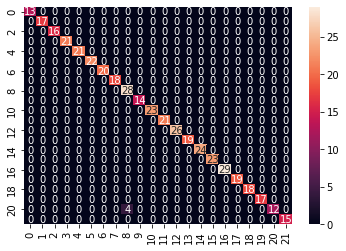

In [ ]:
RF_pred = RF.predict(x_test)

RF_acc = accuracy_score(y_test, RF_pred)
RF_cm = confusion_matrix(y_test, RF_pred)
# Cross validation score
RF_cv_score = cross_val_score(RF, x_train,y_train, cv=5)

print("Random Forest Test Accuracy is :", RF_acc)
print("Random Forest Cross Validation Score is :", RF_cv_score)
sns.heatmap(RF_cm, annot = True)
print(classification_report(y_test, RF_pred))

In [ ]:
# Dump the trained Random Forest Model with Pickle
RF_pkl_filename = '/content/gdrive/MyDrive/CROP_RECOM_MODEL/RFtuned.pkl'
# Open the file to save as pkl file
RF_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_pkl)
# Close the pickle instances
RF_pkl.close()

SVM Train Accuracy is : 0.9767045454545454
SVM Test Accuracy is : 0.9818181818181818
SVM Cross Validation Score is : [0.98295455 0.97443182 0.97443182 0.96590909 0.97159091]
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.85      1.00      0.92        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean   

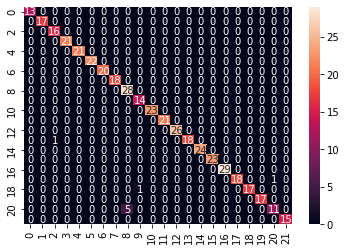

In [ ]:
# Linear SVM
#SVM = SVC(kernel = 'linear', C = 1, probability = True)
SVM = SVC(probability=True)
SVM.fit(x_train,y_train)

SVM_pred_train = SVM.predict(x_train)
SVM_pred = SVM.predict(x_test)

SVM_acc_train = accuracy_score(y_train, SVM_pred_train)
SVM_acc = accuracy_score(y_test, SVM_pred)
SVM_cm = confusion_matrix(y_test, SVM_pred)
# Cross validation score
SVM_cv_score = cross_val_score(SVM, x_train,y_train, cv=5)

print("SVM Train Accuracy is :", SVM_acc_train)
print("SVM Test Accuracy is :", SVM_acc)
print("SVM Cross Validation Score is :", SVM_cv_score)
sns.heatmap(SVM_cm, annot = True)
print(classification_report(y_test, SVM_pred))

In [ ]:
# 1st Run
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']
}

# Instantiate the grid search model
cl_SVM = model_selection.GridSearchCV(estimator = SVM, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
cl_SVM.fit(x_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=2)

In [ ]:
SVM_pred = cl_SVM.predict(x_test)

SVM_acc = accuracy_score(y_test, SVM_pred)

print("Decision Tree Test Accuracy is :", SVM_acc)

Decision Tree Test Accuracy is : 0.975


In [ ]:
# print best parameter after tuning
print(cl_SVM.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(cl_SVM.best_estimator_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.0001, probability=True)


In [ ]:
# 2nd Run
param_grid = {'C': [1000, 10000, 100000],
              'gamma': [0.001, 0.0001, 0.00001, 0.000001],
              'kernel': ['rbf']
}

# Instantiate the grid search model
cl_SVM = model_selection.GridSearchCV(estimator = SVM, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
cl_SVM.fit(x_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.001, 0.0001, 1e-05, 1e-06],
                         'kernel': ['rbf']},
             verbose=2)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
SVM Test Accuracy is : 0.9818181818181818
SVM Cross Validation Score is : [0.98181818 0.98863636 0.99318182 0.98409091 0.98409091]
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.89      0.88        28
 kidneybeans       1.00

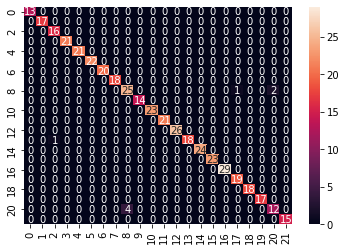

In [ ]:
SVM_pred = cl_SVM.predict(x_test)

SVM_acc = accuracy_score(y_test, SVM_pred)

SVM_acc = accuracy_score(y_test, SVM_pred)
SVM_cm = confusion_matrix(y_test, SVM_pred)
# Cross validation score
SVM_cv_score = cross_val_score(cl_SVM, x_train,y_train, cv=5)

print("SVM Test Accuracy is :", SVM_acc)
print("SVM Cross Validation Score is :", SVM_cv_score)
sns.heatmap(SVM_cm, annot = True)
print(classification_report(y_test, SVM_pred))

In [ ]:
# Dump the trained SVM Model with Pickle
SVM_pkl_filename = '/content/gdrive/MyDrive/CROP_RECOM_MODEL/SVM.pkl'
# Open the file to save as pkl file
SVM_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(cl_SVM, SVM_pkl)
# Close the pickle instances
SVM_pkl.close()

**Using Majority Voting to decide the Ensemble Method Classifier**

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 3 folds for each of 1 candidates, tota

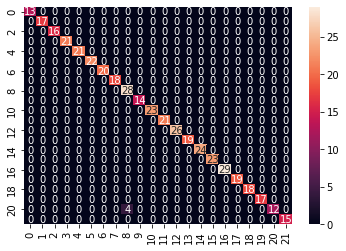

In [ ]:
EVC1 = VotingClassifier(estimators=[('DT', cl_DT), ('RF', cl_RF), ('SVM', cl_SVM)], voting='hard')
EVC1.fit(x_train, y_train)
EVC1_pred = EVC1.predict(x_test)

EVC1_acc = accuracy_score(y_test, EVC1_pred)
EVC1_cm = confusion_matrix(y_test, EVC1_pred)
# Cross validation score
EVC1_cv_score = cross_val_score(EVC1, x_train,y_train, cv=5)

print("Ensemble Voting Accuracy is : %0.4f" % EVC1_acc)
print("Ensemble Voting Cross Validation Score is : ", EVC1_cv_score)
sns.heatmap(EVC1_cm, annot = True)
print(classification_report(y_test, EVC1_pred))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 3 folds for each of 1 candidates, tota

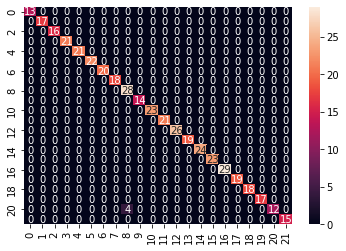

In [ ]:
EVC2 = VotingClassifier(estimators=[('DT', cl_DT), ('RF', cl_RF), ('SVM', cl_SVM)], voting='soft')
EVC2 = EVC2.fit(x_train, y_train)

EVC2_pred = EVC2.predict(x_test)

EVC2_acc = accuracy_score(y_test, EVC2_pred)
EVC2_cm = confusion_matrix(y_test, EVC2_pred)
# Cross validation score
EVC2_cv_score = cross_val_score(EVC2, x_train,y_train, cv=5)

print("Ensemble Voting Accuracy is : %0.4f" % EVC2_acc)
print("Ensemble Voting Cross Validation Score is : ", EVC2_cv_score)
sns.heatmap(EVC1_cm, annot = True)
print(classification_report(y_test, EVC2_pred))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 3 folds for each of 1 candidates, tota

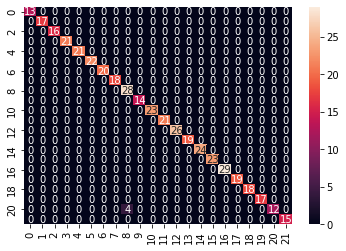

In [ ]:
EVC3 = VotingClassifier(estimators=[('DT', cl_DT), ('RF', cl_RF), ('SVM', cl_SVM)], voting='soft', weights=[1,1,1])
EVC3.fit(x_train, y_train)

EVC3_pred = EVC3.predict(x_test)

EVC3_acc = accuracy_score(y_test, EVC3_pred)
EVC3_cm = confusion_matrix(y_test, EVC3_pred)
# Cross validation score
EVC3_cv_score = cross_val_score(EVC3, x_train,y_train, cv=5)

print("Ensemble Voting Accuracy is : %0.4f" % EVC3_acc)
print("Ensemble Voting Cross Validation Score is : ", EVC3_cv_score)
sns.heatmap(EVC3_cm, annot = True)
print(classification_report(y_test, EVC3_pred))

# Comparing Accuracies

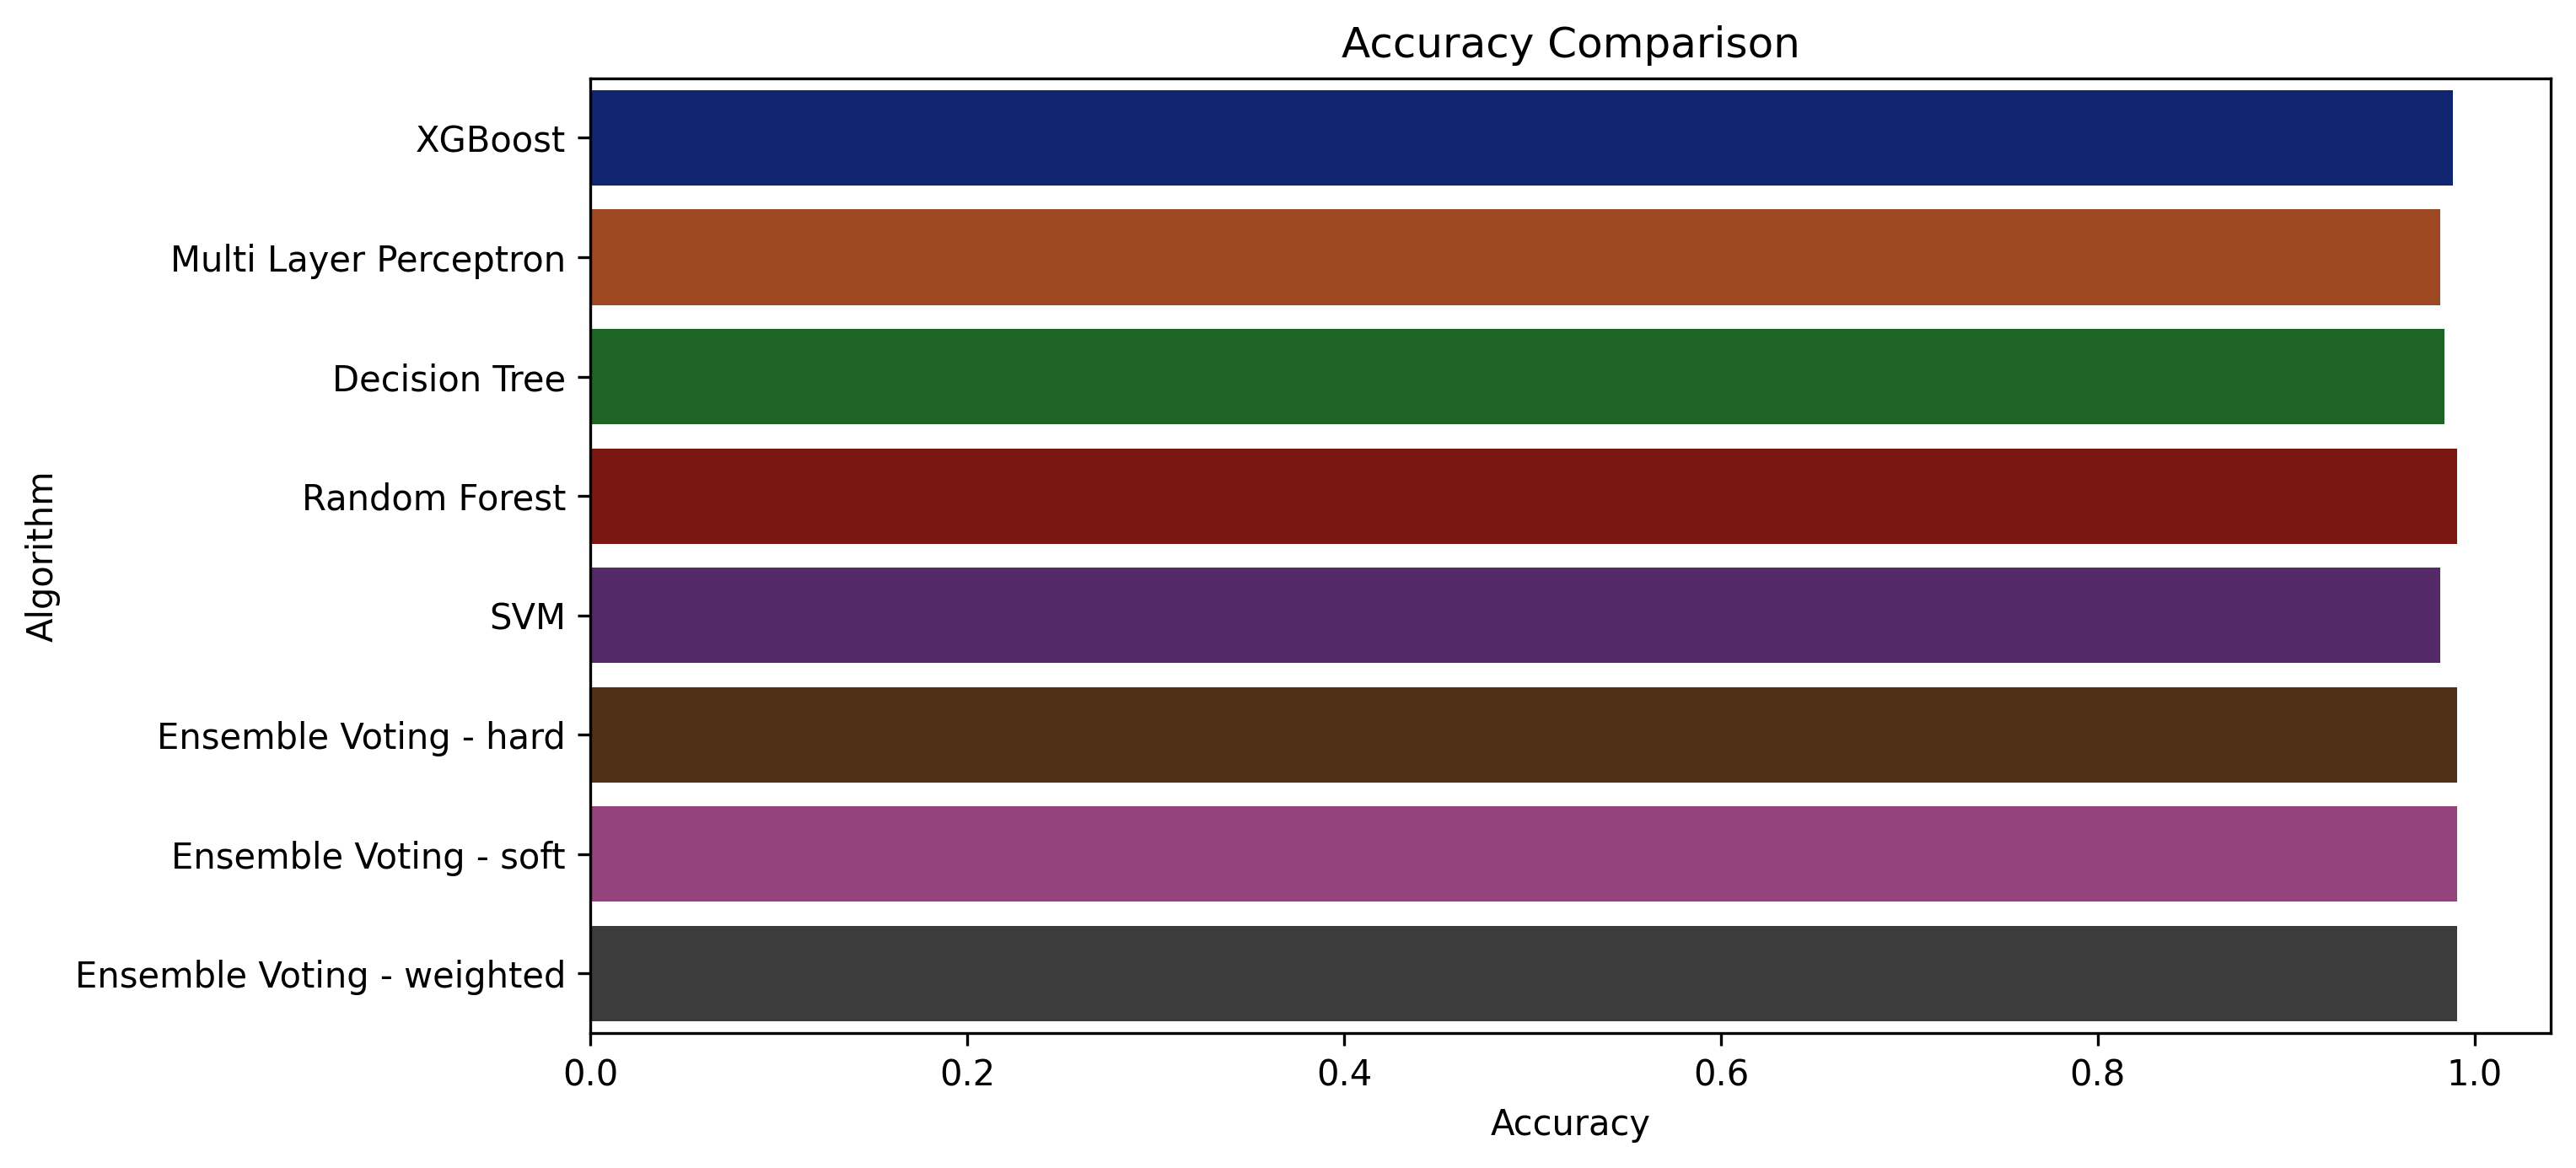

In [ ]:
acc = [XB_acc, MLP_acc, DT_acc, RF_acc, SVM_acc, EVC1_acc, EVC2_acc, EVC3_acc]
models = ['XGBoost', 'Multi Layer Perceptron', 'Decision Tree', 'Random Forest', 'SVM', 'Ensemble Voting - hard', 'Ensemble Voting - soft', 'Ensemble Voting - weighted']

plt.figure(figsize=[10,5],dpi = 300)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc, y = models, palette='dark')

In [ ]:
accuracy_models = dict(zip(models, acc))
for model, accuracy in accuracy_models.items():
    print (model, 'model accuracy - %0.4f' % accuracy)

XGBoost model accuracy - 0.9886
Multi Layer Perceptron model accuracy - 0.9818
Decision Tree model accuracy - 0.9841
Random Forest model accuracy - 0.9909
SVM model accuracy - 0.9818
Ensemble Voting - hard model accuracy - 0.9909
Ensemble Voting - soft model accuracy - 0.9909
Ensemble Voting - weighted model accuracy - 0.9909


# Test the recommender model

In [ ]:
test_data = np.array([[39, 39, 39, 42.3, 87.6, 4.5, 71.5]])
test_pred = EVC1.predict(test_data)
print("Prediction:", test_pred)

In [ ]:
test_data = np.array([[39, 39, 39, 42.3, 87.6, 4.5, 71.5]])
test_pred = cl_RF.predict(test_data)
print("Prediction:", test_pred)